In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2
import preprocessing
import models

In [2]:
# Suppress all warnings globally (adjust based on specific warnings you want to ignore)
# Suppress convergence warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Suppress user warnings (such as inappropriate l1_ratio usage)
warnings.filterwarnings('ignore', category=UserWarning)
#warnings.filterwarnings("ignore", message=".*l1_ratio parameter is only used when penalty is 'elasticnet'")

In [3]:

# Example usage:
param_grid_rf = {
    'n_estimators': [100, 500, 1000, 5000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [4]:
CNA_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/Jessica_Model code & inputs/CNA_no_trim_low_1Mb_irf.tsv'
Ratio_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/Jessica_Model code & inputs/ratios_150_ratio.centered_irf.tsv'
EndMotif_file = '/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/EndMotif_frequency_withRest5.txt'
Output_dir = '/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/ML_output'

CNA = pd.read_csv(CNA_file, sep='\t', index_col=[0,1,2])
Ratio = pd.read_csv(Ratio_file, sep='\t', index_col=[0,1,2])
EndMotif = pd.read_csv(EndMotif_file, sep='\t', index_col=0)





display(CNA.head())
display(Ratio.head())
display(EndMotif.head())

58        73        74        81        83  \
chr  start    end                                                          
chr1 3000001  4000000        NaN       NaN       NaN       NaN       NaN   
     4000001  5000000   0.015625  2.151004  0.015625  0.015625  0.922560   
     5000001  6000000   0.105375  1.091101       inf  0.015625  1.740708   
     7000001  8000000   4.207382  2.421009       inf  0.869690  4.901697   
     14000001 15000000  0.061670  2.455380  0.015625  0.015625  2.733544   

                        BC001_UC1  BC002_UC1  BC003_UC1  BC004_UC1  BC005_UC1  \
chr  start    end                                                               
chr1 3000001  4000000         NaN        NaN        NaN        NaN        NaN   
     4000001  5000000    4.682815   1.686778   0.015625   0.015625   0.015625   
     5000001  6000000    4.739285   1.708846   0.015625   0.015625        inf   
     7000001  8000000    6.268193   2.516174   2.773132   4.300194        inf   
     14000001 15000000   2.639199   1.129221   1.580682   1.073177   0.015625   

                        ...  WBC1324_UC1  WBC1324_UC2  WBC1324_UC3  \
chr  start    end       ...                                          
chr1 3000001  4000000   ...          NaN          NaN          NaN   
     4000001  5000000   ...     0.015625     0.374554     2.153216   
     5000001  6000000   ...     1.199363     0.681652     2.152142   
     7000001  8000000   ...     4.955670     1.415199     2.571430   
     14000001 15000000  ...     0.015625     0.449969     1.554665   

                        WBC1324_UC4  WBC1324_UC5  WBC1325_UC2  WBC1325_UC3  \
chr  start    end                                                            
chr1 3000001  4000000           NaN          NaN          NaN          NaN   
     4000001  5000000      0.015625     0.015625     0.015625     0.015625   
     5000001  6000000      0.258161     0.015625     1.050342     0.015625   
     7000001  8000000      2.628545     2.723716     2.605381     4.064862   
     14000001 15000000     0.015625     0.251518     2.169661     0.246217   

                        WBC1325_UC4  WBC1325_UC5  WBC1325_UC5b  
chr  start    end                                               
chr1 3000001  4000000           NaN          NaN           NaN  
     4000001  5000000      1.067131     0.015625      0.015625  
     5000001  6000000      0.892972     0.015625      0.019046  
     7000001  8000000      3.416386     2.808183      1.777171  
     14000001 15000000     0.360449     4.636063      2.102079  

[5 rows x 243 columns]

58        73        74        81        83  \
chr  start    end                                                          
chr1 5000000  10000000 -0.021039  0.051770  0.035062  0.028886 -0.033048   
     10000000 15000000 -0.019367  0.024914  0.033907  0.018559 -0.037325   
     15000000 20000000 -0.030353  0.036842  0.021390  0.021573 -0.048439   
     20000000 25000000 -0.020654  0.059739  0.031846  0.024240 -0.041196   
     25000000 30000000 -0.020983  0.026992  0.014885  0.020358 -0.034455   

                        BC001_UC1  BC002_UC1  BC003_UC1     BC004_UC1  \
chr  start    end                                                       
chr1 5000000  10000000   0.001773   0.021462   0.012149  1.277114e-02   
     10000000 15000000   0.005899   0.015108   0.011341  1.282568e-02   
     15000000 20000000   0.001090   0.008654  -0.002082 -5.997953e-03   
     20000000 25000000   0.004013   0.012817   0.010174  6.564354e-03   
     25000000 30000000   0.009259   0.015607   0.011452 -9.562842e-07   

                        BC005_UC1  ...  WBC1324_UC1  WBC1324_UC2  WBC1324_UC3  \
chr  start    end                  ...                                          
chr1 5000000  10000000   0.034097  ...     0.019924    -0.025483     0.037087   
     10000000 15000000   0.033062  ...     0.014763    -0.009470     0.025152   
     15000000 20000000   0.006861  ...     0.006242    -0.033472     0.021073   
     20000000 25000000   0.037555  ...     0.015166    -0.022688     0.030645   
     25000000 30000000   0.028230  ...     0.018853    -0.015850     0.025356   

                        WBC1324_UC4  WBC1324_UC5  WBC1325_UC2  WBC1325_UC3  \
chr  start    end                                                            
chr1 5000000  10000000    -0.020098    -0.003235     0.014730     0.046827   
     10000000 15000000    -0.027964    -0.008776     0.009590     0.036753   
     15000000 20000000    -0.034212    -0.015775     0.009115     0.036248   
     20000000 25000000    -0.019502    -0.008385     0.011670     0.040518   
     25000000 30000000    -0.009840    -0.009665     0.010743     0.042024   

                        WBC1325_UC4  WBC1325_UC5  WBC1325_UC5b  
chr  start    end                                               
chr1 5000000  10000000     0.037673     0.094724      0.021397  
     10000000 15000000     0.032190     0.073988     -0.000120  
     15000000 20000000     0.028780     0.097517      0.001499  
     20000000 25000000     0.027899     0.096164      0.014928  
     25000000 30000000     0.030353     0.093724      0.017164  

[5 rows x 242 columns]

,WBC1116_UC1_motifs.txt,WBC1207_UC1_motifs.txt,WBC1135_UC1_motifs.txt,WBC1198_UC1_motifs.txt,WBC1202_UC1_motifs.txt,PB-278_UC1_sorted_motifs.txt,PB046_UC1_sorted_motifs.txt,NU90_sorted_motifs.txt,RCC013_UC1_sorted_motifs.txt,NU71_sorted_motifs.txt,...,WBC1222_UC1.dup_mk_motifs.txt,BC020_UC1.dup_mk_motifs.txt,WBC1196_UC1.dup_mk_motifs.txt,WBC1111_UC1.dup_mk_motifs.txt,WBC1188_UC1.dup_mk_motifs.txt,BC016_UC1.dup_mk_motifs.txt,WBC1309_UC1.dup_mk_motifs.txt,WBC1304_UC1.dup_mk_motifs.txt,WBC1322_UC1.dup_mk_motifs.txt,BC011_UC1.dup_mk_motifs.txt
AAAA,1363822,1649522,1477007,1699021,220132,1697863,2047129,2053065,1694213,1874416,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,442016,492222,505023,516155,62552,558742,655722,645064,545181,612951,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,554817,629741,641695,672116,81528,718290,842404,823364,722142,799007,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,739560,808725,801612,888519,110969,1002696,1147014,1098857,917790,1075842,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,488506,547214,567452,562754,69428,640921,759313,711681,622732,684254,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [5]:
EndMotif.columns = EndMotif.columns.str.replace('_sorted_motifs.txt', '')
EndMotif.columns = EndMotif.columns.str.replace('.dup_mk_motifs.txt', '')
EndMotif.columns = EndMotif.columns.str.replace('_motifs.txt', '')
display(EndMotif.head())

,WBC1116_UC1,WBC1207_UC1,WBC1135_UC1,WBC1198_UC1,WBC1202_UC1,PB-278_UC1,PB046_UC1,NU90,RCC013_UC1,NU71,...,WBC1222_UC1,BC020_UC1,WBC1196_UC1,WBC1111_UC1,WBC1188_UC1,BC016_UC1,WBC1309_UC1,WBC1304_UC1,WBC1322_UC1,BC011_UC1
AAAA,1363822,1649522,1477007,1699021,220132,1697863,2047129,2053065,1694213,1874416,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,442016,492222,505023,516155,62552,558742,655722,645064,545181,612951,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,554817,629741,641695,672116,81528,718290,842404,823364,722142,799007,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,739560,808725,801612,888519,110969,1002696,1147014,1098857,917790,1075842,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,488506,547214,567452,562754,69428,640921,759313,711681,622732,684254,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [6]:
# Step 1: Find common columns
common_columns = set(EndMotif.columns) & set(CNA.columns) & set(Ratio.columns)
common_columns_list = list(common_columns)  # Convert to list

# Step 2: Find non-common columns
non_common_endmotif = set(EndMotif.columns) - common_columns
non_common_cna = set(CNA.columns) - common_columns
non_common_ratio = set(Ratio.columns) - common_columns

# Print non-common columns
print("Non-common columns in EndMotif:", non_common_endmotif)
print("Non-common columns in CNA:", non_common_cna)
print("Non-common columns in Ratio:", non_common_ratio)

# Step 3: Filter DataFrames to keep only common columns
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

Non-common columns in EndMotif: {'WBC1291_UC1'}
Non-common columns in CNA: {'WBC1325_UC5', 'NU18_UC1', 'WBC1320_UC3', 'WBC1291_UC1', 'WBC1324_UC4', 'WBC1324_UC5', 'NU3_UC1', 'NU71_UC1', 'NU16_UC1', 'WBC1325_UC4', 'NU32_UC1', 'WBC1322_UC3', 'WBC1320_UC5', 'NU1_UC1', 'WBC1325_UC2', 'WBC1322_UC5', 'WBC1322_UC4', 'NU33_UC1', 'NU70_UC1', 'WBC1320_UC1b', 'WBC1324_UC3', 'WBC1050_UC2', 'NU19R_UC1', 'NU19_UC1', 'WBC1050_UC3', 'WBC1320_UC4', 'WBC1320_UC2', 'NU68_UC1', 'WBC1317_UC2', 'WBC1325_UC5b', 'WBC1045_UC2', 'WBC1322_UC2', 'WBC1317_UC3', 'WBC1317_UC4', 'NU36_UC1', 'WBC1045_UC3', 'WBC1325_UC3', 'NU75_UC1', 'WBC1324_UC2'}
Non-common columns in Ratio: {'WBC1325_UC5', 'NU18_UC1', 'WBC1320_UC3', 'WBC1324_UC4', 'WBC1324_UC5', 'NU3_UC1', 'NU71_UC1', 'NU16_UC1', 'WBC1325_UC4', 'NU32_UC1', 'WBC1322_UC3', 'WBC1320_UC5', 'NU1_UC1', 'WBC1325_UC2', 'WBC1322_UC5', 'WBC1322_UC4', 'NU33_UC1', 'NU70_UC1', 'WBC1320_UC1b', 'WBC1324_UC3', 'WBC1050_UC2', 'NU19R_UC1', 'NU19_UC1', 'WBC1050_UC3', 'WBC1320_UC4', 'W

NU16  PB402_UC1  RCC004_UC2  WBC1045_UC1  \
chr  start    end                                                      
chr1 3000001  4000000        NaN        NaN         NaN          NaN   
     4000001  5000000   4.423447   0.015625    5.586642     2.045467   
     5000001  6000000   3.829493   0.015625    6.332922     1.947160   
     7000001  8000000   4.825861   4.481436    6.752265     2.196541   
     14000001 15000000  2.311556   0.015625    0.015625     1.386094   

                        PB108_UC1  WBC1140_UC1  RCC008_UC2  RCC002_UC2  \
chr  start    end                                                        
chr1 3000001  4000000         NaN          NaN         NaN         NaN   
     4000001  5000000    0.953588     2.054075         inf         inf   
     5000001  6000000    1.380282     2.125764         inf         inf   
     7000001  8000000    2.059953     2.928511         inf         inf   
     14000001 15000000   1.369233     1.971014    0.015625    0.015625   

                             NU2  RCC005_UC1  ...  WBC1185_UC1      NU19  \
chr  start    end                             ...                          
chr1 3000001  4000000        NaN         NaN  ...          NaN       NaN   
     4000001  5000000   0.015625    0.015625  ...     1.371604       inf   
     5000001  6000000   0.015625    0.015625  ...     1.955075       inf   
     7000001  8000000   3.141635    3.363651  ...     3.883262       inf   
     14000001 15000000  0.929104    0.015625  ...     1.374487  0.015625   

                        PB-377_UC1  BC010_UC1  WBC1222_UC1  RCC018_UC2  \
chr  start    end                                                        
chr1 3000001  4000000          NaN        NaN          NaN         NaN   
     4000001  5000000     0.393538   1.583115     1.467048    0.230081   
     5000001  6000000     2.177534   1.917203     1.824907    0.015625   
     7000001  8000000     5.608684   2.416783     3.341705    2.957988   
     14000001 15000000    2.387847   1.452221     1.343682    0.240698   

                        WBC1202_UC1  WBC1105_UC1  BC011_UC1  BC021_UC1  
chr  start    end                                                       
chr1 3000001  4000000           NaN          NaN        NaN        NaN  
     4000001  5000000      0.015625     1.249235   2.127325   0.015625  
     5000001  6000000      0.015625     2.230009   2.276831   0.015625  
     7000001  8000000      4.612615     4.758066   2.486580        inf  
     14000001 15000000     1.629896     0.869385   1.921535   0.015625  

[5 rows x 204 columns]

(312, 204)


NU16  PB402_UC1  RCC004_UC2  WBC1045_UC1  \
chr  start    end                                                      
chr1 5000000  10000000  0.006504   0.108367    0.010894     0.074790   
     10000000 15000000  0.004640   0.112692    0.010574     0.060258   
     15000000 20000000  0.003774   0.105475    0.003202     0.077176   
     20000000 25000000  0.008004   0.113650    0.011711     0.067446   
     25000000 30000000  0.009567   0.111921    0.011397     0.065019   

                        PB108_UC1  WBC1140_UC1  RCC008_UC2  RCC002_UC2  \
chr  start    end                                                        
chr1 5000000  10000000   0.000798    -0.009791    0.023725   -0.013724   
     10000000 15000000  -0.000611    -0.008034    0.024973   -0.013513   
     15000000 20000000  -0.003582    -0.020488    0.013154   -0.020230   
     20000000 25000000  -0.003296    -0.011771    0.014681   -0.010554   
     25000000 30000000   0.000154    -0.007645    0.015031   -0.012913   

                             NU2  RCC005_UC1  ...  WBC1185_UC1      NU19  \
chr  start    end                             ...                          
chr1 5000000  10000000  0.060445    0.096645  ...    -0.013612 -0.009412   
     10000000 15000000  0.051483    0.087339  ...    -0.018849 -0.004363   
     15000000 20000000  0.039643    0.083906  ...    -0.043807 -0.021817   
     20000000 25000000  0.057445    0.096888  ...    -0.029610 -0.011209   
     25000000 30000000  0.037269    0.086314  ...    -0.027651 -0.009483   

                        PB-377_UC1  BC010_UC1  WBC1222_UC1  RCC018_UC2  \
chr  start    end                                                        
chr1 5000000  10000000    0.044674   0.021575     0.028226    0.068465   
     10000000 15000000    0.023791   0.012765     0.017823    0.063733   
     15000000 20000000    0.005747   0.012873    -0.008868    0.062140   
     20000000 25000000    0.040397   0.018084     0.027212    0.072040   
     25000000 30000000    0.026598   0.023513     0.021685    0.061277   

                        WBC1202_UC1  WBC1105_UC1  BC011_UC1  BC021_UC1  
chr  start    end                                                       
chr1 5000000  10000000    -0.017187     0.017220  -0.217251   0.115211  
     10000000 15000000    -0.019244     0.014321  -0.189567   0.098256  
     15000000 20000000    -0.052550     0.013584  -0.279060   0.087663  
     20000000 25000000    -0.035105     0.016913  -0.210258   0.086465  
     25000000 30000000    -0.040499     0.018278  -0.218705   0.105661  

[5 rows x 204 columns]

(256, 204)


,NU16,PB402_UC1,RCC004_UC2,WBC1045_UC1,PB108_UC1,WBC1140_UC1,RCC008_UC2,RCC002_UC2,NU2,RCC005_UC1,...,WBC1185_UC1,NU19,PB-377_UC1,BC010_UC1,WBC1222_UC1,RCC018_UC2,WBC1202_UC1,WBC1105_UC1,BC011_UC1,BC021_UC1
AAAA,1694212,2657742,2561441,1826143,2214544,2026307,1831324,2000978,1874902,2405033,...,3423754,1984234,1944433,2464466,3387457,1779930,220132,1890132,3840687,4804443
AAAC,586375,623500,826299,660830,727290,698703,635665,673021,547958,687883,...,988097,620100,570855,737319,764229,553181,62552,613662,1107479,1291701
AAAG,762161,848494,1064734,919232,952662,907857,807647,887109,728120,898293,...,1278135,796030,744478,970441,982137,737876,81528,761249,1468987,1617250
AAAT,976612,1047591,1440070,1129218,1257832,1137063,1043739,1143387,958561,1247670,...,1725135,1092706,928191,1288063,1085110,955078,110969,973352,1674478,2246014
AACA,676956,769297,956003,734058,823805,756424,754719,782794,639756,780461,...,1149163,696405,698640,794764,935029,649448,69428,696976,1398048,1563675


In [7]:
# Sort the common columns list alphabetically
common_columns_list = sorted(list(common_columns))

# Reassign the DataFrames using the sorted common columns list
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

(1352, 204)


58        73        74        81        83  \
chr  start    end                                                          
chr1 3000001  4000000        NaN       NaN       NaN       NaN       NaN   
     4000001  5000000   0.015625  2.151004  0.015625  0.015625  0.922560   
     5000001  6000000   0.105375  1.091101       inf  0.015625  1.740708   
     7000001  8000000   4.207382  2.421009       inf  0.869690  4.901697   
     14000001 15000000  0.061670  2.455380  0.015625  0.015625  2.733544   

                        BC001_UC1  BC002_UC1  BC003_UC1  BC004_UC1  BC005_UC1  \
chr  start    end                                                               
chr1 3000001  4000000         NaN        NaN        NaN        NaN        NaN   
     4000001  5000000    4.682815   1.686778   0.015625   0.015625   0.015625   
     5000001  6000000    4.739285   1.708846   0.015625   0.015625        inf   
     7000001  8000000    6.268193   2.516174   2.773132   4.300194        inf   
     14000001 15000000   2.639199   1.129221   1.580682   1.073177   0.015625   

                        ...  WBC1311_UC1  WBC1312_UC1  WBC1313_UC1  \
chr  start    end       ...                                          
chr1 3000001  4000000   ...          NaN          NaN          NaN   
     4000001  5000000   ...     0.015625     2.539834     1.524870   
     5000001  6000000   ...     0.015625     2.917542     1.566301   
     7000001  8000000   ...          inf     7.692731     1.752591   
     14000001 15000000  ...     0.015625     0.015625     1.126022   

                        WBC1314_UC1  WBC1315_UC1  WBC1317_UC1  WBC1318_UC1  \
chr  start    end                                                            
chr1 3000001  4000000           NaN          NaN          NaN          NaN   
     4000001  5000000      7.162511     1.771867     1.382492     0.015625   
     5000001  6000000      6.742773     1.839251     1.392199     0.015625   
     7000001  8000000     10.071579     2.570771     2.711366          inf   
     14000001 15000000     1.472195     1.861022     0.966995     0.015625   

                        WBC1320_UC1  WBC1322_UC1  WBC1324_UC1  
chr  start    end                                              
chr1 3000001  4000000           NaN          NaN          NaN  
     4000001  5000000           inf     0.784409     0.015625  
     5000001  6000000           inf     1.083908     1.199363  
     7000001  8000000           inf     1.571305     4.955670  
     14000001 15000000     0.015625     0.648787     0.015625  

[5 rows x 204 columns]

(312, 204)


58        73        74        81        83  \
chr  start    end                                                          
chr1 5000000  10000000 -0.021039  0.051770  0.035062  0.028886 -0.033048   
     10000000 15000000 -0.019367  0.024914  0.033907  0.018559 -0.037325   
     15000000 20000000 -0.030353  0.036842  0.021390  0.021573 -0.048439   
     20000000 25000000 -0.020654  0.059739  0.031846  0.024240 -0.041196   
     25000000 30000000 -0.020983  0.026992  0.014885  0.020358 -0.034455   

                        BC001_UC1  BC002_UC1  BC003_UC1     BC004_UC1  \
chr  start    end                                                       
chr1 5000000  10000000   0.001773   0.021462   0.012149  1.277114e-02   
     10000000 15000000   0.005899   0.015108   0.011341  1.282568e-02   
     15000000 20000000   0.001090   0.008654  -0.002082 -5.997953e-03   
     20000000 25000000   0.004013   0.012817   0.010174  6.564354e-03   
     25000000 30000000   0.009259   0.015607   0.011452 -9.562842e-07   

                        BC005_UC1  ...  WBC1311_UC1  WBC1312_UC1  WBC1313_UC1  \
chr  start    end                  ...                                          
chr1 5000000  10000000   0.034097  ...     0.018560    -0.011622    -0.017025   
     10000000 15000000   0.033062  ...     0.014002    -0.003107    -0.011186   
     15000000 20000000   0.006861  ...    -0.006208    -0.013992    -0.021590   
     20000000 25000000   0.037555  ...     0.018111    -0.005459    -0.008415   
     25000000 30000000   0.028230  ...     0.006256    -0.014720    -0.005249   

                        WBC1314_UC1  WBC1315_UC1  WBC1317_UC1  WBC1318_UC1  \
chr  start    end                                                            
chr1 5000000  10000000     0.003578     0.073420     0.030748     0.000096   
     10000000 15000000     0.004146     0.069920     0.022014    -0.009324   
     15000000 20000000     0.000763     0.055114     0.016451    -0.012564   
     20000000 25000000     0.002161     0.073577     0.025016    -0.004567   
     25000000 30000000     0.009170     0.026160     0.028319    -0.014588   

                        WBC1320_UC1  WBC1322_UC1  WBC1324_UC1  
chr  start    end                                              
chr1 5000000  10000000     0.045943    -0.048431     0.019924  
     10000000 15000000     0.039728    -0.045393     0.014763  
     15000000 20000000     0.024183    -0.079331     0.006242  
     20000000 25000000     0.031184    -0.048032     0.015166  
     25000000 30000000     0.049296    -0.058022     0.018853  

[5 rows x 204 columns]

(256, 204)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1318_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
AAAA,1773406,1587091,1887836,1692740,1351234,1947498,1772534,2215453,2194241,4373856,...,6396863,4114169,5442866,3373010,1828537,4126103,1994076,5080512,7808827,2200138
AAAC,560709,501785,517189,515721,594904,659277,549197,656513,599598,1203850,...,1733476,1228579,1716645,1083556,505765,1241514,614127,1593973,2241726,698165
AAAG,736759,646249,692175,676333,723339,901326,734643,889613,787765,1533031,...,2209077,1541324,2350170,1455933,709674,1592712,782947,2130402,2918270,972379
AAAT,986962,828327,885726,885751,1042110,1137365,912342,1125191,1050821,2079990,...,2942472,2032709,3089527,1818640,888758,2121078,1026192,2802885,3622751,1220497
AACA,628611,613356,590285,618050,629813,721027,615778,741675,667928,1472676,...,2110289,1435625,1868176,1187004,606221,1417487,708828,1959415,2690625,750111


In [8]:
CNA_t  = preprocessing.preprocess_dataframe(CNA)
display(CNA_t.head(n=10))

chr          chr1                                                              \
start     3000001   4000001   5000001   7000001  14000001  17000001  18000001   
end       4000000   5000000   6000000   8000000  15000000  18000000  19000000   
58            NaN  0.015625  0.105375  4.207382  0.061670  0.015625  2.352325   
73            NaN  2.151004  1.091101  2.421009  2.455380  0.015625  0.015625   
74            NaN  0.015625       inf       inf  0.015625  0.015625       inf   
81            NaN  0.015625  0.015625  0.869690  0.015625  0.015625  0.015625   
83            NaN  0.922560  1.740708  4.901697  2.733544  0.015625  3.825098   
BC001_UC1     NaN  4.682815  4.739285  6.268193  2.639199  0.015625  2.177672   
BC002_UC1     NaN  1.686778  1.708846  2.516174  1.129221  0.015625  1.468900   
BC003_UC1     NaN  0.015625  0.015625  2.773132  1.580682  0.015625  0.098665   
BC004_UC1     NaN  0.015625  0.015625  4.300194  1.073177  0.015625  0.631417   
BC005_UC1     NaN  0.015625       inf       inf  0.015625  0.015625       inf   

chr                                     ...      chr9                      \
start      22000001 29000001  33000001  ... 123000001 124000001 126000001   
end        23000000 30000000  34000000  ... 124000000 125000000 127000000   
58         4.258621      NaN  2.742873  ...  2.520066  3.618625  3.614009   
73         0.015625      NaN  0.986117  ...  6.304718  5.515289  0.835260   
74              inf      NaN  0.015625  ...  0.015625       inf       inf   
81         0.351419      NaN  0.387245  ...  3.450159  3.992970  1.442585   
83         2.934842      NaN  4.816821  ...  2.806672  2.242043  2.838691   
BC001_UC1  3.568086      NaN  1.417457  ...  0.388875  1.823752  1.979704   
BC002_UC1  1.883352      NaN  1.726733  ...  1.430656  1.735158  1.771016   
BC003_UC1  1.689060      NaN  2.088575  ...  3.645189  4.064631  1.577402   
BC004_UC1  3.118153      NaN  2.297596  ...  1.448075  4.423699  1.675844   
BC005_UC1       inf      NaN       inf  ...  0.015625       inf       inf   

chr                                                                     \
start      127000001 132000001 133000001 134000001 135000001 136000001   
end        128000000 133000000 134000000 135000000 136000000 137000000   
58          6.924299  3.863697  0.015625       NaN  4.534116       NaN   
73         12.289532  5.456690  0.015625       NaN  3.823995       NaN   
74               inf       inf  0.015625       NaN       inf       NaN   
81          5.506857  2.193202  0.015625       NaN  2.874923       NaN   
83          6.670038  3.815812  0.015625       NaN  3.422317       NaN   
BC001_UC1   3.531405  1.437824  0.015625       NaN  2.774121       NaN   
BC002_UC1   2.120234  1.756240  0.015625       NaN  1.636460       NaN   
BC003_UC1   6.360148  3.012500  0.015625       NaN  4.442390       NaN   
BC004_UC1   5.587627  3.006049  0.015625       NaN  2.577370       NaN   
BC005_UC1        inf       inf  0.015625       NaN       inf       NaN   

chr         target  
start               
end                 
58         Healthy  
73         Healthy  
74         Healthy  
81         Healthy  
83         Healthy  
BC001_UC1  Bladder  
BC002_UC1  Bladder  
BC003_UC1  Bladder  
BC004_UC1  Bladder  
BC005_UC1  Bladder  

[10 rows x 1353 columns]

In [9]:
Ratio_t = preprocessing.preprocess_dataframe(Ratio)
display(Ratio_t.head(n=10))

chr            chr1                                                        \
start       5000000  10000000  15000000  20000000      25000000  30000000   
end        10000000  15000000  20000000  25000000      30000000  35000000   
58        -0.021039 -0.019367 -0.030353 -0.020654 -2.098302e-02 -0.011688   
73         0.051770  0.024914  0.036842  0.059739  2.699196e-02  0.059263   
74         0.035062  0.033907  0.021390  0.031846  1.488474e-02  0.024985   
81         0.028886  0.018559  0.021573  0.024240  2.035761e-02  0.019593   
83        -0.033048 -0.037325 -0.048439 -0.041196 -3.445464e-02 -0.029842   
BC001_UC1  0.001773  0.005899  0.001090  0.004013  9.259055e-03  0.001114   
BC002_UC1  0.021462  0.015108  0.008654  0.012817  1.560669e-02  0.012384   
BC003_UC1  0.012149  0.011341 -0.002082  0.010174  1.145213e-02  0.013576   
BC004_UC1  0.012771  0.012826 -0.005998  0.006564 -9.562842e-07  0.023310   
BC005_UC1  0.034097  0.033062  0.006861  0.037555  2.822959e-02  0.034255   

chr                                                ...      chr9            \
start      35000000  40000000  45000000  50000000  ...  20000000  25000000   
end        40000000  45000000  50000000  55000000  ...  25000000  30000000   
58        -0.010893 -0.020116 -0.014497 -0.018139  ...  0.015006  0.011725   
73         0.024624  0.042534  0.010221  0.001072  ... -0.033648 -0.036388   
74         0.018009  0.017431 -0.009482  0.005712  ... -0.021091 -0.019005   
81         0.003843  0.012119 -0.009127 -0.012554  ...  0.001900 -0.002607   
83        -0.020518 -0.021768 -0.022954 -0.017482  ...  0.017985  0.019683   
BC001_UC1  0.003944  0.005430  0.000056  0.004991  ... -0.005370 -0.001673   
BC002_UC1  0.007988  0.005751 -0.003250  0.005263  ... -0.010184 -0.021263   
BC003_UC1  0.013175  0.001322 -0.010533  0.000986  ... -0.006689 -0.005413   
BC004_UC1  0.013885 -0.000274 -0.006900 -0.000430  ... -0.011044 -0.004128   
BC005_UC1  0.016869  0.017036 -0.006845  0.018240  ... -0.014738 -0.009885   

chr                                                                    \
start      90000000  95000000 100000000 110000000 115000000 120000000   
end        95000000 100000000 105000000 115000000 120000000 125000000   
58        -0.009685 -0.017064  0.015936 -0.017214  0.002501 -0.012768   
73         0.038446 -0.007840 -0.057904  0.039415  0.014236 -0.000344   
74        -0.005667  0.010702 -0.020067  0.003183  0.008317  0.014109   
81         0.014636 -0.013138 -0.011739  0.010163 -0.009431 -0.009023   
83        -0.017984 -0.011737  0.017108 -0.017930  0.009451 -0.019297   
BC001_UC1  0.000619  0.002758 -0.004630  0.006037 -0.006101 -0.000322   
BC002_UC1  0.000904  0.004138 -0.010135  0.007143  0.000489  0.008998   
BC003_UC1  0.001644 -0.004609 -0.007393  0.008884  0.009904 -0.005574   
BC004_UC1  0.002584 -0.001808 -0.005359 -0.005403  0.007719  0.002094   
BC005_UC1 -0.002098 -0.000740 -0.014605  0.004030  0.010796  0.007706   

chr                   target  
start     125000000           
end       130000000           
58        -0.025228  Healthy  
73         0.032791  Healthy  
74         0.023628  Healthy  
81         0.011814  Healthy  
83        -0.045386  Healthy  
BC001_UC1  0.006258  Bladder  
BC002_UC1  0.022992  Bladder  
BC003_UC1  0.012285  Bladder  
BC004_UC1  0.008729  Bladder  
BC005_UC1  0.023855  Bladder  

[10 rows x 313 columns]

In [10]:
EndMotif_t = preprocessing.preprocess_dataframe(EndMotif)
display(EndMotif_t.head(n=10))

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,1773406,560709,736759,986962,628611,321587,90911,475110,668171,277184,...,492672,293362,126111,225688,367892,589155,480160,376707,1173413,Healthy
73,1587091,501785,646249,828327,613356,306271,83869,436504,612742,246958,...,455947,264024,108622,201397,348060,509079,423960,325374,1075806,Healthy
74,1887836,517189,692175,885726,590285,298465,88066,423570,664680,254706,...,506800,287325,125198,218660,363725,568509,479018,367728,1337271,Healthy
81,1692740,515721,676333,885751,618050,312410,88345,450700,642054,261437,...,484428,295011,123366,222690,372001,566296,456914,363952,1181875,Healthy
83,1351234,594904,723339,1042110,629813,371051,78817,493783,563214,287541,...,346972,243441,94095,210660,306356,471020,380509,310184,834192,Healthy
BC001_UC1,1947498,659277,901326,1137365,721027,377518,108398,564919,777499,340058,...,573934,343768,148300,261403,425147,692014,583740,445498,1332659,Bladder
BC002_UC1,1772534,549197,734643,912342,615778,315533,89938,451553,668957,280878,...,478633,290004,122769,222283,369658,558754,470002,374161,1208929,Bladder
BC003_UC1,2215453,656513,889613,1125191,741675,380403,107406,548199,814501,327281,...,602520,333955,140717,260656,427519,677354,576728,437252,1544787,Bladder
BC004_UC1,2194241,599598,787765,1050821,667928,343498,104040,496820,739142,289379,...,574220,347869,152872,261557,424017,683217,555755,442021,1588384,Bladder
BC005_UC1,4373856,1203850,1533031,2079990,1472676,680520,185266,1014609,1453279,511460,...,1088041,633755,230600,433284,804106,1319622,1033215,787967,2876733,Bladder


# Data preparation

In [11]:
CNA_t = preprocessing.remove_nan_inf_columns(CNA_t)
Ratio_t = preprocessing.remove_nan_inf_columns(Ratio_t)
EndMotif_t = preprocessing.normalize_features_by_sample(preprocessing.remove_nan_inf_columns(EndMotif_t))

display(CNA_t.head(n=10))
display(Ratio_t.head(n=10))
display(EndMotif_t.head(n=10))

chr            chr1                                                    \
start      14000001  17000001  41000001  56000001  57000001  60000001   
end        15000000  18000000  42000000  57000000  58000000  61000000   
58         0.061670  0.015625  0.015625  0.015625  0.015625  0.429733   
73         2.455380  0.015625  0.015625  0.015625  2.360906  0.015625   
74         0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   
81         0.015625  0.015625  0.015625  0.015625  0.921143  0.015625   
83         2.733544  0.015625  0.015625  1.225360  0.015625  1.637310   
BC001_UC1  2.639199  0.015625  0.015625  0.015625  1.130458  0.868384   
BC002_UC1  1.129221  0.015625  0.015625  1.244978  1.637506  1.925958   
BC003_UC1  1.580682  0.015625  0.015625  0.051024  0.015625  0.015625   
BC004_UC1  1.073177  0.015625  0.015625  0.015625  0.015625  0.519311   
BC005_UC1  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   

chr                                                ...      chr9            \
start      63000001  64000001  66000001  72000001  ...  20000001  25000001   
end        64000000  65000000  67000000  73000000  ...  21000000  26000000   
58         0.015625  1.797781  2.063192  0.015625  ...  2.261833  0.015625   
73         0.015625  0.015625  0.015625  0.015625  ...  1.622996  0.015625   
74         0.015625  0.015625  0.015625  0.015625  ...  0.015625  0.015625   
81         1.429497  1.375022  0.015625  0.015625  ...  1.235997  0.015625   
83         0.603499  2.856995  1.984119  0.015625  ...  2.806672  0.015625   
BC001_UC1  0.015625  0.739396  0.015625  0.015625  ...  0.015625  0.015625   
BC002_UC1  1.675232  1.916361  1.927025  0.156795  ...  6.194499  3.955098   
BC003_UC1  0.312066  1.777918  1.646336  0.015625  ...  2.301247  0.015625   
BC004_UC1  0.622787  1.961712  1.553097  0.015625  ...  1.996985  0.015625   
BC005_UC1  0.015625  0.015625  0.015625  0.015625  ...  0.015625  0.015625   

chr                                                                    \
start      76000001  79000001  80000001  82000001  84000001 108000001   
end        77000000  80000000  81000000  83000000  85000000 109000000   
58         0.015625  0.015625  0.122865  0.015625  0.258580  0.015625   
73         1.015494  0.015625  0.015625  0.015625  0.015625  0.015625   
74         0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   
81         1.205667  0.015625  0.015625  0.015625  0.015625  0.015625   
83         0.922560  0.855958  1.087142  0.044579  0.215693  0.272834   
BC001_UC1  0.659340  0.417261  0.145565  0.015625  0.696489  0.030077   
BC002_UC1  0.900434  0.764690  1.132256  1.082771  1.327784  0.769622   
BC003_UC1  0.015625  0.015625  1.949520  0.015625  0.356783  0.015625   
BC004_UC1  0.015625  0.015625  0.377312  0.015625  1.029729  0.015625   
BC005_UC1  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   

chr                   target  
start     133000001           
end       134000000           
58         0.015625  Healthy  
73         0.015625  Healthy  
74         0.015625  Healthy  
81         0.015625  Healthy  
83         0.015625  Healthy  
BC001_UC1  0.015625  Bladder  
BC002_UC1  0.015625  Bladder  
BC003_UC1  0.015625  Bladder  
BC004_UC1  0.015625  Bladder  
BC005_UC1  0.015625  Bladder  

[10 rows x 328 columns]

chr            chr1                                                        \
start       5000000  10000000  15000000  20000000      25000000  30000000   
end        10000000  15000000  20000000  25000000      30000000  35000000   
58        -0.021039 -0.019367 -0.030353 -0.020654 -2.098302e-02 -0.011688   
73         0.051770  0.024914  0.036842  0.059739  2.699196e-02  0.059263   
74         0.035062  0.033907  0.021390  0.031846  1.488474e-02  0.024985   
81         0.028886  0.018559  0.021573  0.024240  2.035761e-02  0.019593   
83        -0.033048 -0.037325 -0.048439 -0.041196 -3.445464e-02 -0.029842   
BC001_UC1  0.001773  0.005899  0.001090  0.004013  9.259055e-03  0.001114   
BC002_UC1  0.021462  0.015108  0.008654  0.012817  1.560669e-02  0.012384   
BC003_UC1  0.012149  0.011341 -0.002082  0.010174  1.145213e-02  0.013576   
BC004_UC1  0.012771  0.012826 -0.005998  0.006564 -9.562842e-07  0.023310   
BC005_UC1  0.034097  0.033062  0.006861  0.037555  2.822959e-02  0.034255   

chr                                                ...      chr9            \
start      35000000  40000000  45000000  50000000  ...  20000000  25000000   
end        40000000  45000000  50000000  55000000  ...  25000000  30000000   
58        -0.010893 -0.020116 -0.014497 -0.018139  ...  0.015006  0.011725   
73         0.024624  0.042534  0.010221  0.001072  ... -0.033648 -0.036388   
74         0.018009  0.017431 -0.009482  0.005712  ... -0.021091 -0.019005   
81         0.003843  0.012119 -0.009127 -0.012554  ...  0.001900 -0.002607   
83        -0.020518 -0.021768 -0.022954 -0.017482  ...  0.017985  0.019683   
BC001_UC1  0.003944  0.005430  0.000056  0.004991  ... -0.005370 -0.001673   
BC002_UC1  0.007988  0.005751 -0.003250  0.005263  ... -0.010184 -0.021263   
BC003_UC1  0.013175  0.001322 -0.010533  0.000986  ... -0.006689 -0.005413   
BC004_UC1  0.013885 -0.000274 -0.006900 -0.000430  ... -0.011044 -0.004128   
BC005_UC1  0.016869  0.017036 -0.006845  0.018240  ... -0.014738 -0.009885   

chr                                                                    \
start      90000000  95000000 100000000 110000000 115000000 120000000   
end        95000000 100000000 105000000 115000000 120000000 125000000   
58        -0.009685 -0.017064  0.015936 -0.017214  0.002501 -0.012768   
73         0.038446 -0.007840 -0.057904  0.039415  0.014236 -0.000344   
74        -0.005667  0.010702 -0.020067  0.003183  0.008317  0.014109   
81         0.014636 -0.013138 -0.011739  0.010163 -0.009431 -0.009023   
83        -0.017984 -0.011737  0.017108 -0.017930  0.009451 -0.019297   
BC001_UC1  0.000619  0.002758 -0.004630  0.006037 -0.006101 -0.000322   
BC002_UC1  0.000904  0.004138 -0.010135  0.007143  0.000489  0.008998   
BC003_UC1  0.001644 -0.004609 -0.007393  0.008884  0.009904 -0.005574   
BC004_UC1  0.002584 -0.001808 -0.005359 -0.005403  0.007719  0.002094   
BC005_UC1 -0.002098 -0.000740 -0.014605  0.004030  0.010796  0.007706   

chr                   target  
start     125000000           
end       130000000           
58        -0.025228  Healthy  
73         0.032791  Healthy  
74         0.023628  Healthy  
81         0.011814  Healthy  
83        -0.045386  Healthy  
BC001_UC1  0.006258  Bladder  
BC002_UC1  0.022992  Bladder  
BC003_UC1  0.012285  Bladder  
BC004_UC1  0.008729  Bladder  
BC005_UC1  0.023855  Bladder  

[10 rows x 313 columns]

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,15089.985883,4771.096350,6269.113169,8398.100969,5348.877311,2736.397244,773.565504,4042.730877,5685.495006,2358.570258,...,4192.166670,2496.229537,1073.083778,1920.388639,3130.408427,5013.144555,4085.701538,3205.415631,9984.620332,Healthy
73,13830.525129,4372.748665,5631.663864,7218.362015,5345.021534,2668.964011,730.866921,3803.864770,5339.670900,2152.087577,...,3973.298595,2300.807305,946.574141,1755.051392,3033.129529,4436.311404,3694.551499,2835.434946,9374.989788,Healthy
74,16582.400609,4542.892067,6079.936574,7780.052590,5184.953748,2621.661097,773.555379,3720.560168,5838.425603,2237.290172,...,4451.637022,2523.809407,1099.715967,1920.668807,3194.892809,4993.677411,4207.605097,3230.054417,11746.339960,Healthy
81,14656.527583,4465.351478,5856.004625,7669.242744,5351.363395,2704.990596,764.931962,3902.369520,5559.201154,2263.642734,...,4194.402179,2554.341989,1068.160014,1928.153247,3220.957098,4903.253272,3956.173213,3151.265124,10233.221603,Healthy
83,12480.529336,5494.767615,6681.043853,9625.338339,5817.200886,3427.173155,727.984850,4560.774238,5202.066296,2655.841909,...,3204.770028,2248.516942,869.098474,1945.738717,2829.624658,4350.526206,3514.530967,2864.981573,7704.925814,Healthy
BC001_UC1,14112.179486,4777.327296,6531.290038,8241.702441,5224.787105,2735.613477,785.485804,4093.579723,5634.000876,2464.166603,...,4158.905232,2491.050423,1074.628173,1894.207878,3080.748104,5014.549835,4229.962574,3228.217814,9656.863833,Bladder
BC002_UC1,14948.187414,4631.504774,6195.413598,7693.990187,5192.997680,2660.962452,758.467866,3808.050436,5641.468433,2368.708857,...,4036.422312,2445.670516,1035.339249,1874.563728,3117.411041,4712.101156,3963.635101,3155.385877,10195.176658,Bladder
BC003_UC1,15733.329387,4662.312979,6317.703131,7990.691125,5267.102066,2701.481683,762.757764,3893.106934,5784.285435,2324.228848,...,4278.874624,2371.625133,999.320189,1851.082693,3036.082122,4810.318067,4095.709361,3105.202295,10970.507026,Bladder
BC004_UC1,17264.891751,4717.801994,6198.351708,8268.148674,5255.441229,2702.736749,818.615338,3909.116419,5815.772570,2276.913571,...,4518.120909,2737.128979,1202.838946,2058.002422,3336.282389,5375.739286,4372.833210,3477.942813,12497.842224,Bladder
BC005_UC1,16446.718222,4526.756649,5764.553950,7821.247301,5537.605080,2558.913847,696.643350,3815.166372,5464.667838,1923.208835,...,4091.287811,2383.066545,867.109759,1629.248850,3023.626019,4962.086359,3885.129270,2962.939616,10817.186723,Bladder


In [12]:


CNA_t_unique = preprocessing.make_value_unique(CNA_t, 0.015625)
display(CNA_t_unique.head(n=10))

chr            chr1                                                    \
start      14000001  17000001  41000001  56000001  57000001  60000001   
end        15000000  18000000  42000000  57000000  58000000  61000000   
58         0.061670  0.015627  0.015627  0.015627  0.015626  0.429733   
73         2.455380  0.015626  0.015627  0.015626  2.360906  0.015627   
74         0.015627  0.015627  0.015627  0.015627  0.015627  0.015626   
81         0.015626  0.015626  0.015626  0.015626  0.921143  0.015627   
83         2.733544  0.015626  0.015627  1.225360  0.015627  1.637310   
BC001_UC1  2.639199  0.015626  0.015626  0.015627  1.130458  0.868384   
BC002_UC1  1.129221  0.015627  0.015627  1.244978  1.637506  1.925958   
BC003_UC1  1.580682  0.015627  0.015627  0.051024  0.015627  0.015626   
BC004_UC1  1.073177  0.015627  0.015626  0.015626  0.015626  0.519311   
BC005_UC1  0.015626  0.015626  0.015626  0.015627  0.015626  0.015627   

chr                                                ...      chr9            \
start      63000001  64000001  66000001  72000001  ...  20000001  25000001   
end        64000000  65000000  67000000  73000000  ...  21000000  26000000   
58         0.015626  1.797781  2.063192  0.015627  ...  2.261833  0.015626   
73         0.015627  0.015627  0.015626  0.015627  ...  1.622996  0.015626   
74         0.015627  0.015627  0.015627  0.015626  ...  0.015627  0.015627   
81         1.429497  1.375022  0.015627  0.015627  ...  1.235997  0.015626   
83         0.603499  2.856995  1.984119  0.015627  ...  2.806672  0.015627   
BC001_UC1  0.015626  0.739396  0.015627  0.015627  ...  0.015626  0.015626   
BC002_UC1  1.675232  1.916361  1.927025  0.156795  ...  6.194499  3.955098   
BC003_UC1  0.312066  1.777918  1.646336  0.015626  ...  2.301247  0.015626   
BC004_UC1  0.622787  1.961712  1.553097  0.015626  ...  1.996985  0.015626   
BC005_UC1  0.015626  0.015627  0.015626  0.015627  ...  0.015627  0.015626   

chr                                                                    \
start      76000001  79000001  80000001  82000001  84000001 108000001   
end        77000000  80000000  81000000  83000000  85000000 109000000   
58         0.015627  0.015627  0.122865  0.015627  0.258580  0.015626   
73         1.015494  0.015627  0.015626  0.015627  0.015627  0.015627   
74         0.015627  0.015626  0.015626  0.015626  0.015626  0.015626   
81         1.205667  0.015626  0.015626  0.015626  0.015626  0.015626   
83         0.922560  0.855958  1.087142  0.044579  0.215693  0.272834   
BC001_UC1  0.659340  0.417261  0.145565  0.015627  0.696489  0.030077   
BC002_UC1  0.900434  0.764690  1.132256  1.082771  1.327784  0.769622   
BC003_UC1  0.015626  0.015627  1.949520  0.015627  0.356783  0.015627   
BC004_UC1  0.015627  0.015627  0.377312  0.015626  1.029729  0.015626   
BC005_UC1  0.015626  0.015626  0.015626  0.015627  0.015627  0.015626   

chr                   target  
start     133000001           
end       134000000           
58         0.015626  Healthy  
73         0.015626  Healthy  
74         0.015626  Healthy  
81         0.015626  Healthy  
83         0.015627  Healthy  
BC001_UC1  0.015626  Bladder  
BC002_UC1  0.015626  Bladder  
BC003_UC1  0.015627  Bladder  
BC004_UC1  0.015626  Bladder  
BC005_UC1  0.015627  Bladder  

[10 rows x 328 columns]

In [13]:
display(CNA_t_unique.describe())
display(Ratio_t.describe())
display(EndMotif_t.describe())

chr          chr1                                                              \
start   14000001    17000001    41000001    56000001    57000001    60000001    
end     15000000    18000000    42000000    57000000    58000000    61000000    
count  204.000000  204.000000  204.000000  204.000000  204.000000  204.000000   
mean     1.036923    0.058990    0.106139    0.350845    0.470036    0.577457   
std      1.172458    0.251874    0.390265    0.598442    0.799201    0.806221   
min      0.015626    0.015626    0.015626    0.015626    0.015626    0.015626   
25%      0.015627    0.015626    0.015626    0.015626    0.015626    0.015627   
50%      0.846512    0.015627    0.015626    0.015627    0.015627    0.015627   
75%      1.766424    0.015627    0.015627    0.514923    0.623118    1.070175   
max      7.421583    2.132907    3.609856    2.859925    4.591634    4.947437   

chr                                                    ...        chr9  \
start   63000001    64000001    66000001    72000001   ...   18000001    
end     64000000    65000000    67000000    73000000   ...   19000000    
count  204.000000  204.000000  204.000000  204.000000  ...  204.000000   
mean     0.410543    1.094815    0.685563    0.128982  ...    0.482881   
std      0.632504    0.856408    0.780038    0.387158  ...    1.079622   
min      0.015626    0.015626    0.015626    0.015626  ...    0.015626   
25%      0.015626    0.021424    0.015627    0.015626  ...    0.015626   
50%      0.015627    1.201366    0.163845    0.015627  ...    0.015627   
75%      0.674145    1.798420    1.347675    0.015627  ...    0.562799   
max      2.967657    3.098589    2.748442    2.451997  ...    7.908309   

chr                                                                            \
start   20000001    25000001    76000001    79000001    80000001    82000001    
end     21000000    26000000    77000000    80000000    81000000    83000000    
count  204.000000  204.000000  204.000000  204.000000  204.000000  204.000000   
mean     1.144051    0.229387    0.413085    0.303527    0.706600    0.431144   
std      1.289239    0.728640    0.592294    0.562048    0.914809    0.724008   
min      0.015626    0.015626    0.015626    0.015626    0.015626    0.015626   
25%      0.015627    0.015626    0.015626    0.015626    0.015627    0.015626   
50%      0.857122    0.015627    0.015627    0.015627    0.250564    0.015627   
75%      1.985136    0.015627    0.682218    0.453184    1.217534    0.656039   
max      7.267276    4.994072    3.210317    3.249797    4.913643    3.468710   

chr                                        
start   84000001    108000001   133000001  
end     85000000    109000000   134000000  
count  204.000000  204.000000  204.000000  
mean     0.627602    0.319736    0.043756  
std      0.817983    0.576387    0.187974  
min      0.015626    0.015626    0.015626  
25%      0.015627    0.015626    0.015626  
50%      0.216698    0.015627    0.015627  
75%      1.030981    0.425214    0.015627  
max      4.218951    3.219082    1.608367  

[8 rows x 327 columns]

chr          chr1                                                              \
start   5000000     10000000    15000000    20000000    25000000    30000000    
end     10000000    15000000    20000000    25000000    30000000    35000000    
count  204.000000  204.000000  204.000000  204.000000  204.000000  204.000000   
mean     0.051826    0.045735    0.046086    0.045218    0.047285    0.050408   
std      0.426327    0.420924    0.551328    0.410136    0.465149    0.447652   
min     -0.217251   -0.189567   -0.279060   -0.210258   -0.218705   -0.181453   
25%     -0.003934   -0.006714   -0.019392   -0.005508   -0.008337   -0.003207   
50%      0.009779    0.006192    0.001836    0.006751    0.008194    0.009172   
75%      0.029223    0.023132    0.018718    0.027278    0.027093    0.027667   
max      5.923864    5.883368    7.727941    5.729002    6.513192    6.279382   

chr                                                    ...        chr9  \
start   35000000    40000000    45000000    50000000   ...   15000000    
end     40000000    45000000    50000000    55000000   ...   20000000    
count  204.000000  204.000000  204.000000  204.000000  ...  204.000000   
mean     0.032474    0.030731   -0.001838    0.013330  ...   -0.011854   
std      0.255546    0.296093    0.061662    0.114027  ...    0.121849   
min     -0.160301   -0.158480   -0.096279   -0.102085  ...   -1.708884   
25%     -0.004789   -0.008744   -0.011885   -0.006098  ...   -0.007934   
50%      0.006499    0.003805   -0.006210    0.001636  ...   -0.002125   
75%      0.020268    0.017556    0.000621    0.010642  ...    0.002777   
max      3.472960    4.129102    0.787161    1.471701  ...    0.127637   

chr                                                                            \
start   20000000    25000000    90000000    95000000    100000000   110000000   
end     25000000    30000000    95000000    100000000   105000000   115000000   
count  204.000000  204.000000  204.000000  204.000000  204.000000  204.000000   
mean    -0.023876   -0.022723    0.004326    0.013344   -0.023392    0.012808   
std      0.197817    0.218970    0.074799    0.183197    0.192300    0.111521   
min     -2.730597   -3.042161   -0.109134   -0.075988   -2.663955   -0.090137   
25%     -0.017703   -0.013979   -0.008636   -0.007811   -0.014997   -0.004025   
50%     -0.005469   -0.004000   -0.000910   -0.001041   -0.005181    0.002814   
75%      0.003884    0.006418    0.005994    0.006964    0.002592    0.010482   
max      0.243442    0.204607    0.932350    2.585937    0.177880    1.531955   

chr                                        
start   115000000   120000000   125000000  
end     120000000   125000000   130000000  
count  204.000000  204.000000  204.000000  
mean     0.007329    0.022273    0.046997  
std      0.040774    0.206976    0.384508  
min     -0.223804   -0.083387   -0.161744  
25%     -0.002220   -0.005958   -0.008320  
50%      0.002834    0.001102    0.008644  
75%      0.010659    0.014960    0.027790  
max      0.429678    2.863477    5.246793  

[8 rows x 312 columns]

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,15274.369071,4674.018421,6095.301739,8006.532693,5380.039588,2698.573596,767.112714,3926.188098,5564.277726,2229.004691,...,797.766334,4144.066255,2521.767894,1053.525328,1899.009923,3168.049087,4936.054517,4046.482700,3183.920676,10530.593489
std,1266.419156,264.134672,367.753434,619.006669,263.101170,140.386337,60.738395,293.221073,271.138023,178.317295,...,63.532575,259.223315,236.785675,152.295851,202.356181,180.422100,354.642280,241.068588,244.266637,1040.354172
min,11534.311664,3662.023154,4706.192038,5199.616797,4480.460501,2245.517584,623.958609,2879.706304,4323.940618,1579.952017,...,570.569472,3163.400923,1807.486416,669.560492,1436.817012,2642.739878,3338.245117,3119.815538,2455.135400,7469.041394
25%,14631.872538,4550.690657,5881.191294,7680.221183,5210.600199,2624.137425,731.046803,3775.913593,5431.024391,2148.301934,...,768.666008,4031.846791,2374.447478,948.951637,1803.941628,3076.597651,4740.438238,3904.548694,3006.468088,9979.017595
50%,15308.924122,4690.852254,6139.013729,7996.869614,5351.539832,2708.814422,763.448361,3915.590161,5561.470175,2267.194264,...,805.061508,4161.918629,2485.138910,1046.269205,1884.511080,3163.706005,4963.785606,4080.262583,3191.982522,10533.335016
75%,15959.553555,4828.700902,6300.181478,8400.079245,5555.895013,2785.833500,793.581785,4069.947956,5734.760781,2340.043451,...,837.713749,4300.362845,2627.553176,1118.378958,1958.710678,3255.385006,5163.216254,4198.394149,3324.072223,11004.343337
max,20003.317496,5494.767615,7202.170736,9625.338339,6022.718312,3427.173155,963.347092,5688.539705,6398.871377,2680.760410,...,944.198014,5242.465626,3834.297352,1750.078982,3097.548760,4448.570429,5789.363740,4791.761593,3800.903677,15105.706635


# ML model

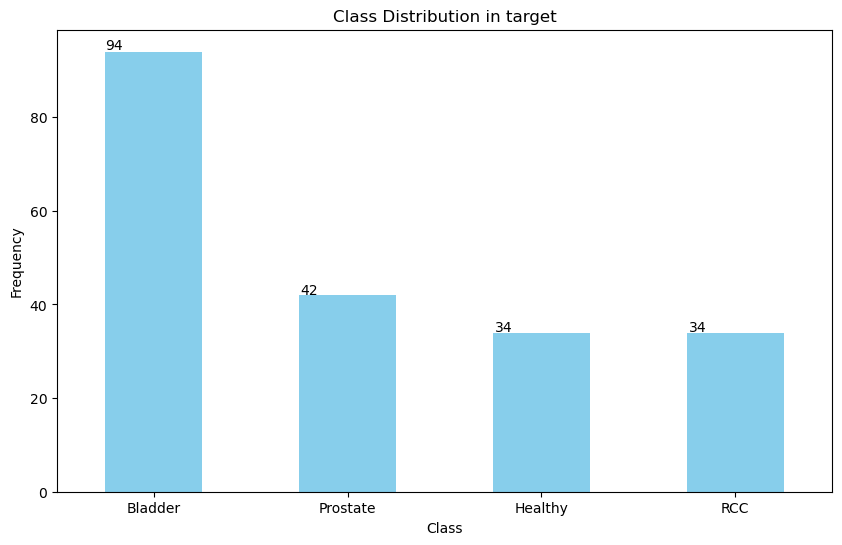

In [14]:

preprocessing.plot_class_distribution(EndMotif_t)

In [15]:


TEST_SIZE = 0.3
CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t_unique, test_size=TEST_SIZE)

Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)




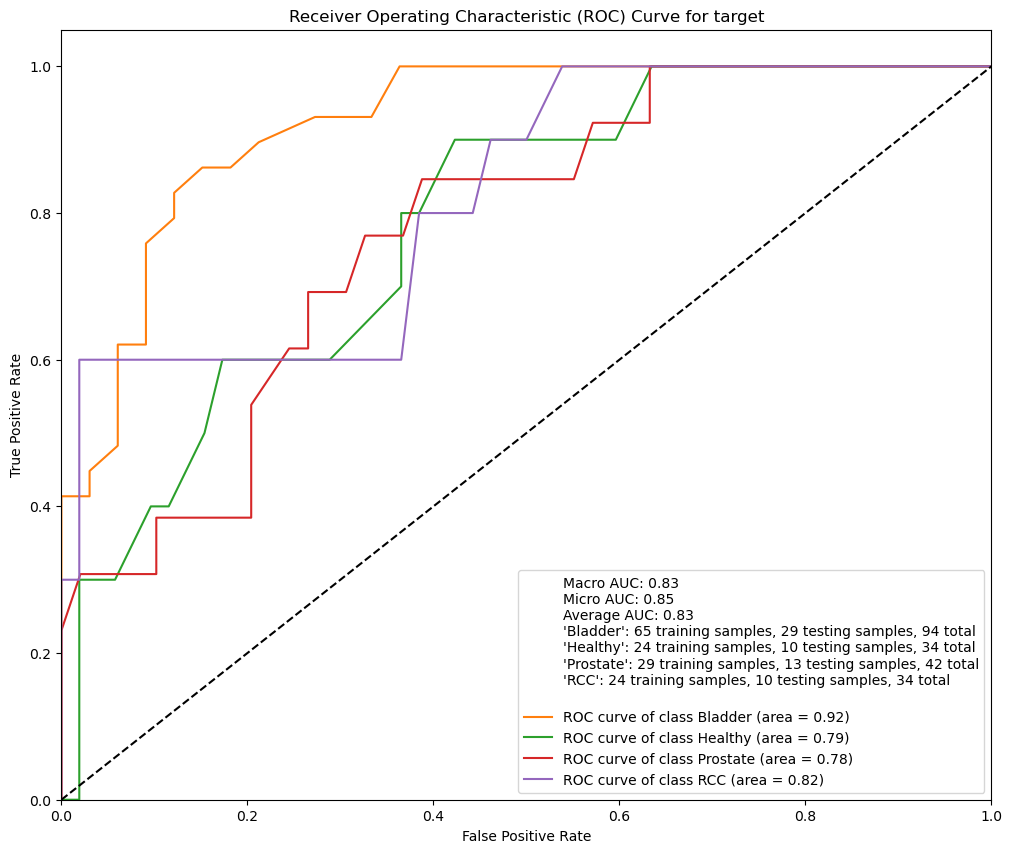

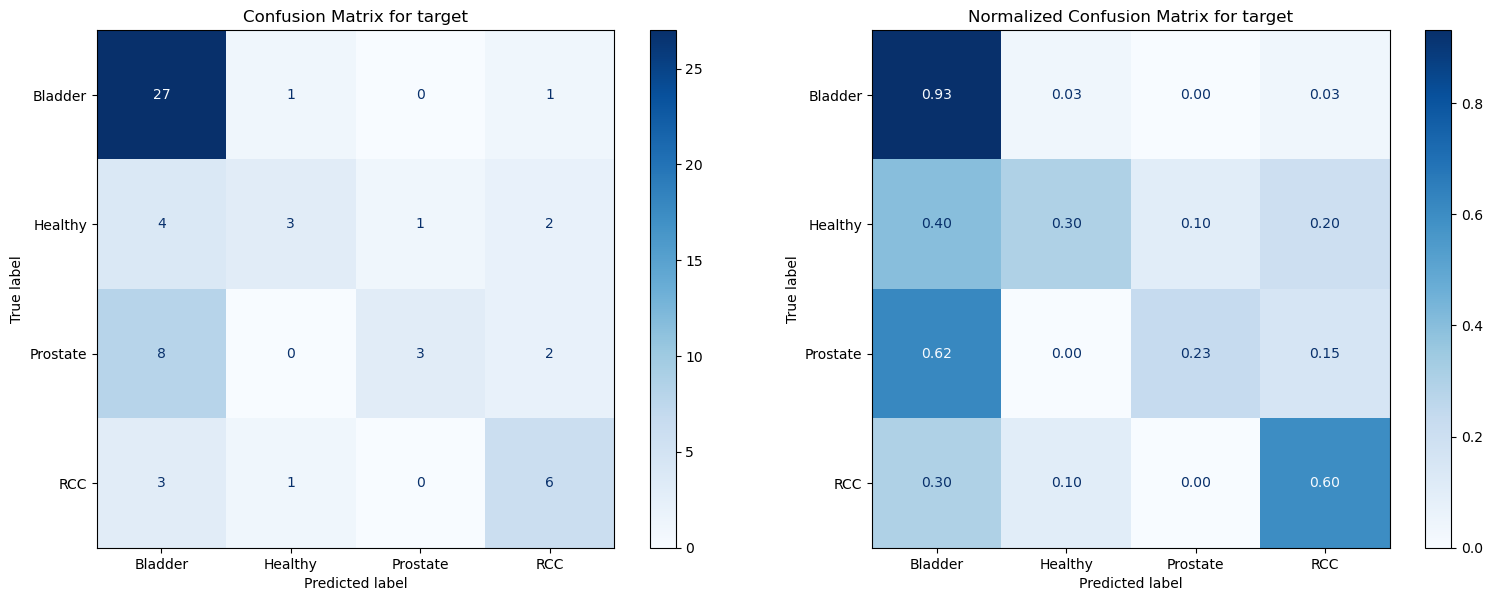

In [16]:
EndMotif_rf = models.train_model(EndMotif_train, EndMotif_test)

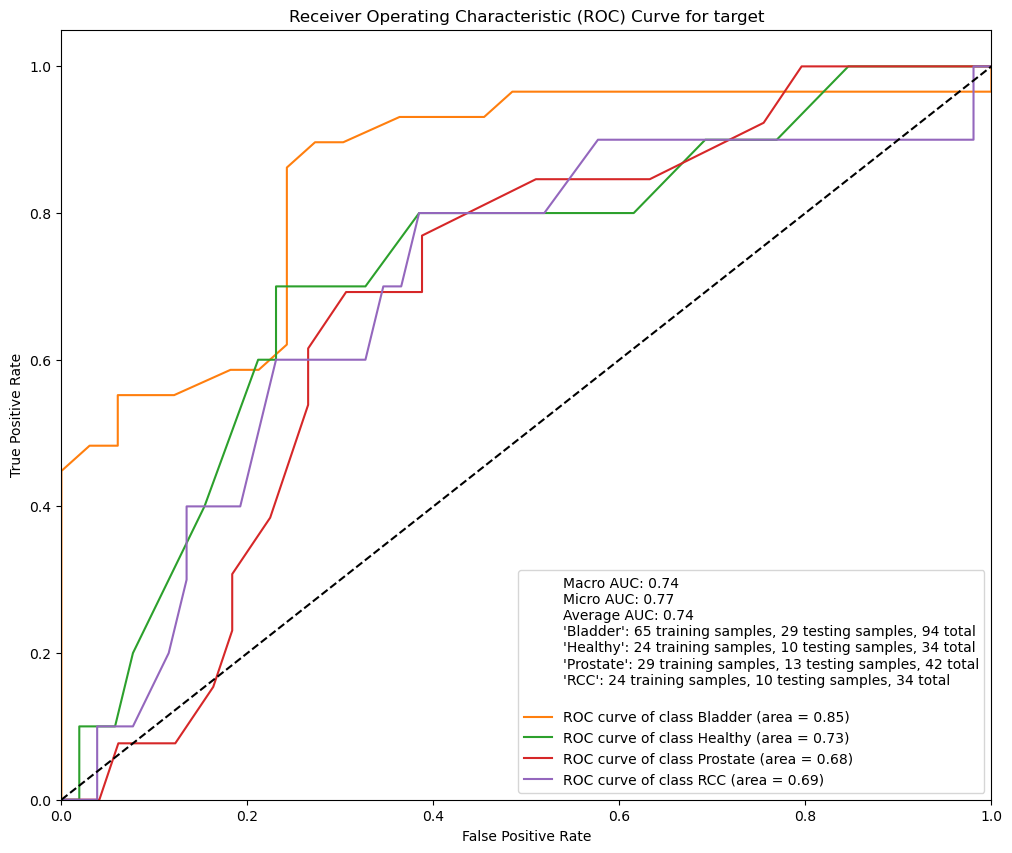

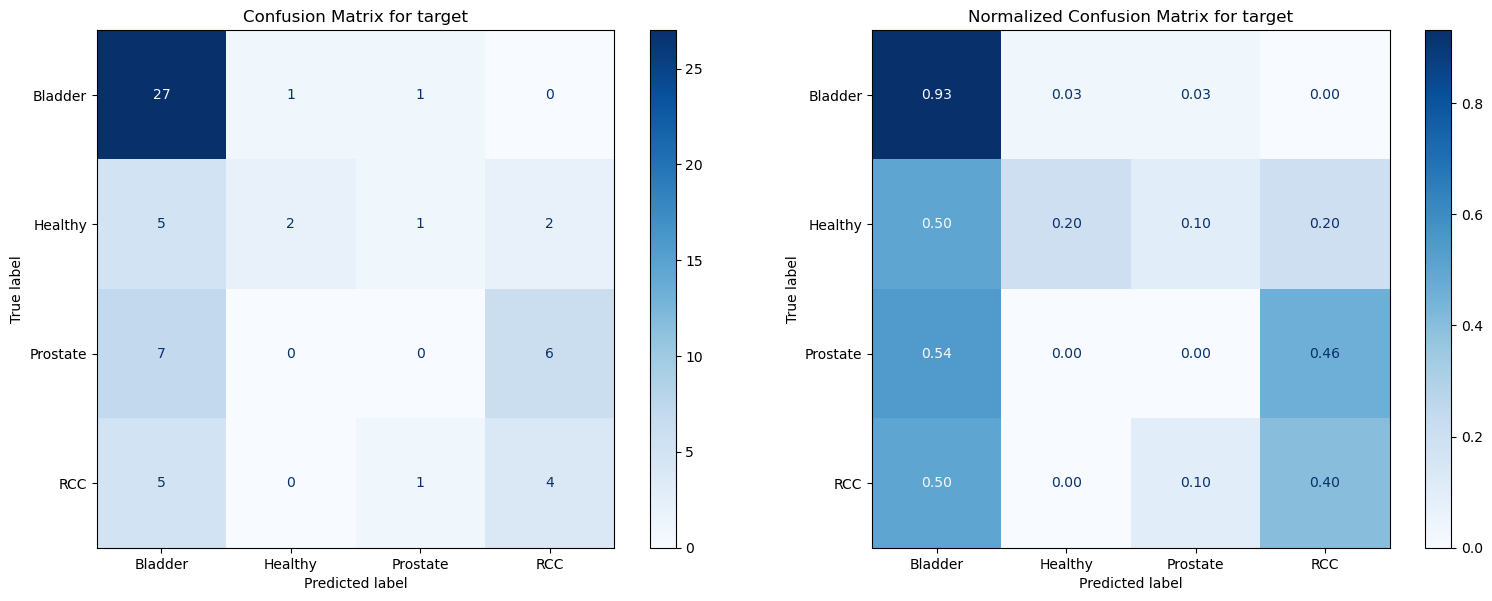

In [17]:
Ratio_rf = models.train_model(Ratio_train, Ratio_test)

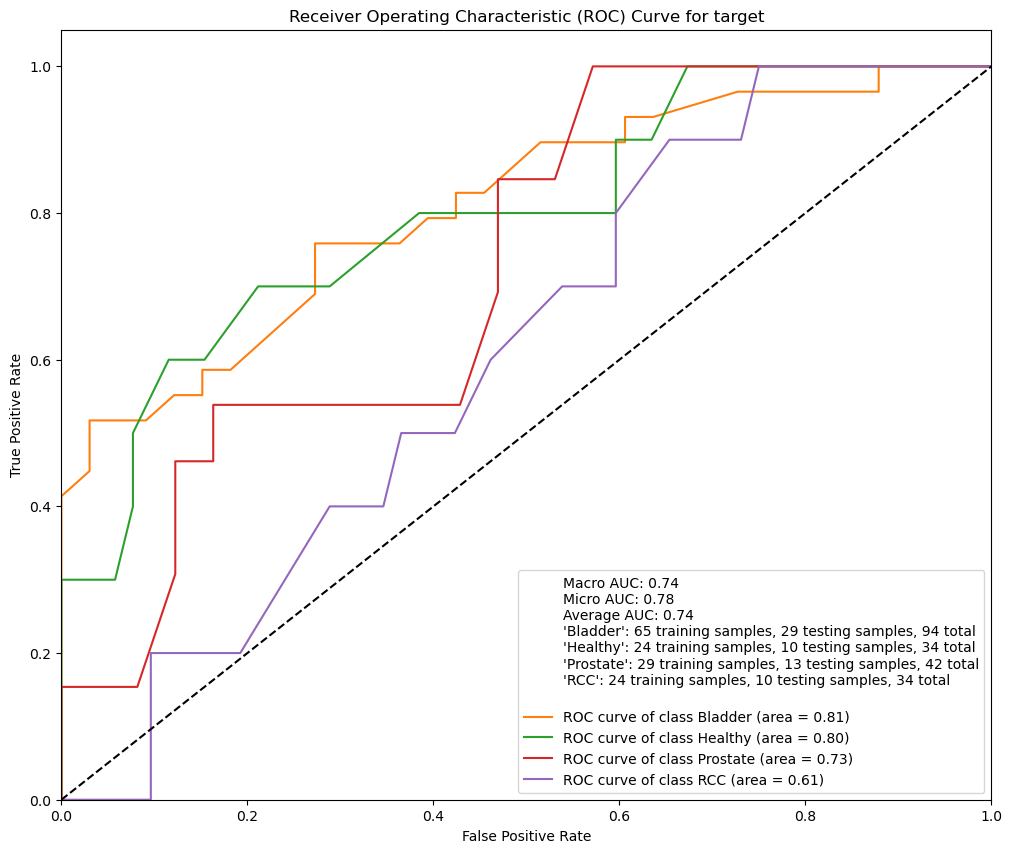

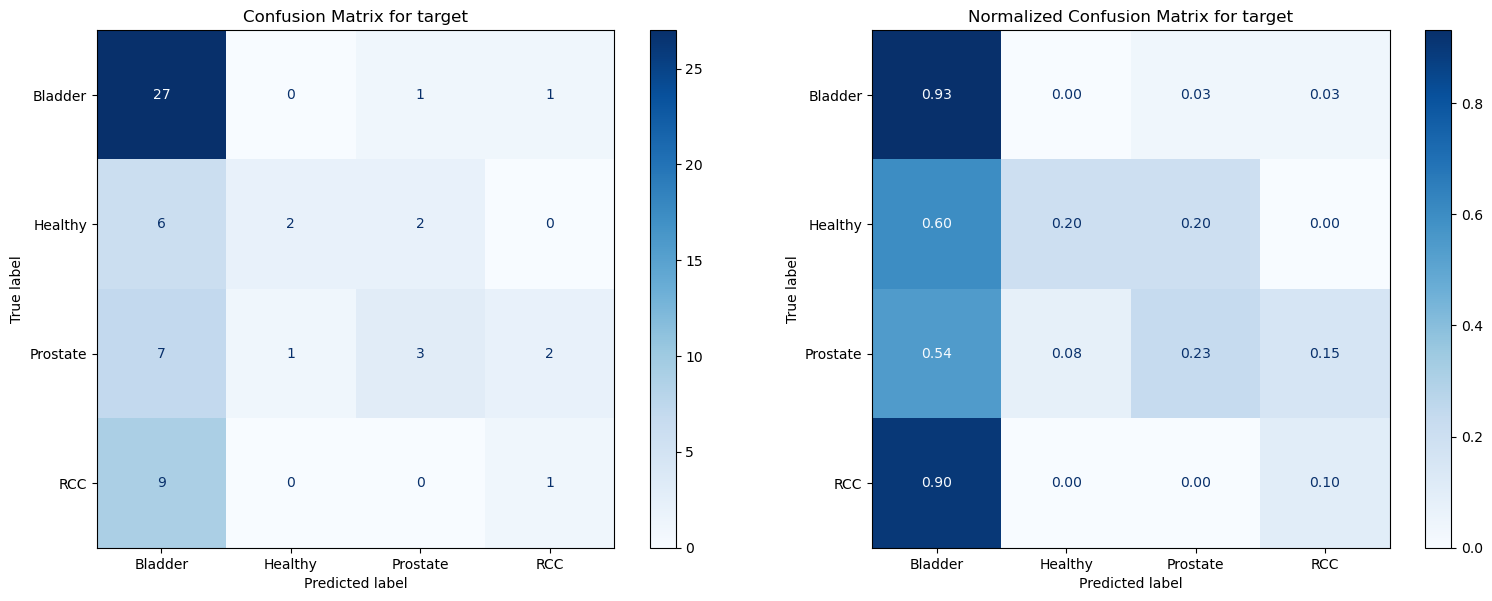

In [18]:
CNA_rf = models.train_model(CNA_train, CNA_test)

# Meta Model

## Combine all features to a single dataframe

In [19]:

CNA_scaled = preprocessing.standardize_dataframe(CNA_t_unique)
Ratio_scaled = preprocessing.standardize_dataframe(Ratio_t)
EndMotif_scaled = preprocessing.standardize_dataframe(EndMotif_t)





# CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t_unique, test_size=TEST_SIZE)

# Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

# EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)

display(CNA_scaled.head())

chr        chr1                                                              \
start  14000001  17000001  41000001  56000001  57000001  60000001  63000001   
end    15000000  18000000  42000000  57000000  58000000  61000000  64000000   
58    -0.833848 -0.172585 -0.232495 -0.561530 -0.569979 -0.183681 -0.625906   
73     1.212791 -0.172587 -0.232496 -0.561530  2.371772 -0.698584 -0.625905   
74    -0.873216 -0.172586 -0.232495 -0.561530 -0.569978 -0.698584 -0.625905   
81    -0.873216 -0.172587 -0.232497 -0.561531  0.565836 -0.698584  1.614949   
83     1.450622 -0.172587 -0.232496  1.464913 -0.569979  1.317828  0.305819   

chr                                  ...      chr9                      \
start  64000001  66000001  72000001  ...  20000001  25000001  76000001   
end    65000000  67000000  73000000  ...  21000000  26000000  77000000   
58     0.822850  1.770449 -0.293509  ...  0.869142 -0.294092 -0.672700   
73    -1.263233 -0.860963 -0.293510  ...  0.372408 -0.294092  1.019581   
74    -1.263234 -0.860963 -0.293511  ... -0.877417 -0.294091 -0.672700   
81     0.327994 -0.860963 -0.293510  ...  0.071493 -0.294092  1.341449   
83     2.062703  1.668829 -0.293510  ...  1.292787 -0.294091  0.862289   

chr                                                                 target  
start  79000001  80000001  82000001  84000001 108000001 133000001           
end    80000000  81000000  83000000  85000000 109000000 134000000           
58    -0.513494 -0.639664 -0.575324 -0.452246 -0.528911 -0.150013  Healthy  
73    -0.513495 -0.757178 -0.575324 -0.749992 -0.528911 -0.150014  Healthy  
74    -0.513495 -0.757178 -0.575325 -0.749993 -0.528912 -0.150013  Healthy  
81    -0.513495 -0.757178 -0.575325 -0.749993 -0.528912 -0.150015  Healthy  
83     0.985307  0.417003 -0.535237 -0.504806 -0.081573 -0.150011  Healthy  

[5 rows x 328 columns]

In [20]:
preprocessing.check_scaling(CNA_scaled)

Means:
 chr   start      end      
chr1  14000001   15000000    -6.427321e-16
      17000001   18000000    -1.251722e-17
      41000001   42000000    -5.727989e-17
      56000001   57000000    -1.779622e-16
      57000001   58000000     1.183694e-16
                                  ...     
chr9  80000001   81000000     8.163405e-18
      82000001   83000000     2.149697e-16
      84000001   85000000    -1.632681e-18
      108000001  109000000   -1.066685e-16
      133000001  134000000   -3.156516e-17
Length: 327, dtype: float64
Standard Deviations:
 chr   start      end      
chr1  14000001   15000000     1.00246
      17000001   18000000     1.00246
      41000001   42000000     1.00246
      56000001   57000000     1.00246
      57000001   58000000     1.00246
                               ...   
chr9  80000001   81000000     1.00246
      82000001   83000000     1.00246
      84000001   85000000     1.00246
      108000001  109000000    1.00246
      133000001  134000000    1.002

(chr   start      end      
 chr1  14000001   15000000    -6.427321e-16
       17000001   18000000    -1.251722e-17
       41000001   42000000    -5.727989e-17
       56000001   57000000    -1.779622e-16
       57000001   58000000     1.183694e-16
                                   ...     
 chr9  80000001   81000000     8.163405e-18
       82000001   83000000     2.149697e-16
       84000001   85000000    -1.632681e-18
       108000001  109000000   -1.066685e-16
       133000001  134000000   -3.156516e-17
 Length: 327, dtype: float64,
 chr   start      end      
 chr1  14000001   15000000     1.00246
       17000001   18000000     1.00246
       41000001   42000000     1.00246
       56000001   57000000     1.00246
       57000001   58000000     1.00246
                                ...   
 chr9  80000001   81000000     1.00246
       82000001   83000000     1.00246
       84000001   85000000     1.00246
       108000001  109000000    1.00246
       133000001  134000000    1.00246
 

In [21]:
preprocessing.check_scaling(EndMotif_scaled)

Means:
 AAAA    3.134747e-16
AAAC   -1.741526e-17
AAAG   -3.069440e-15
AAAT   -2.438137e-16
AACA   -8.707632e-18
            ...     
TTGT   -9.360704e-16
TTTA   -1.480297e-16
TTTC   -2.673243e-15
TTTG    1.306145e-16
TTTT   -1.480297e-16
Length: 256, dtype: float64
Standard Deviations:
 AAAA    1.00246
AAAC    1.00246
AAAG    1.00246
AAAT    1.00246
AACA    1.00246
         ...   
TTGT    1.00246
TTTA    1.00246
TTTC    1.00246
TTTG    1.00246
TTTT    1.00246
Length: 256, dtype: float64


(AAAA    3.134747e-16
 AAAC   -1.741526e-17
 AAAG   -3.069440e-15
 AAAT   -2.438137e-16
 AACA   -8.707632e-18
             ...     
 TTGT   -9.360704e-16
 TTTA   -1.480297e-16
 TTTC   -2.673243e-15
 TTTG    1.306145e-16
 TTTT   -1.480297e-16
 Length: 256, dtype: float64,
 AAAA    1.00246
 AAAC    1.00246
 AAAG    1.00246
 AAAT    1.00246
 AACA    1.00246
          ...   
 TTGT    1.00246
 TTTA    1.00246
 TTTC    1.00246
 TTTG    1.00246
 TTTT    1.00246
 Length: 256, dtype: float64)

In [22]:
import preprocessing

combined_df = preprocessing.combine_feature_dfs_with_target([(CNA_scaled, 'CNA_'), (Ratio_scaled, 'Ratio_'), (EndMotif_scaled, 'EndMotif_')])

display(combined_df)

,CNA_chr1-CNA_14000001-CNA_15000000,CNA_chr1-CNA_17000001-CNA_18000000,CNA_chr1-CNA_41000001-CNA_42000000,CNA_chr1-CNA_56000001-CNA_57000000,CNA_chr1-CNA_57000001-CNA_58000000,CNA_chr1-CNA_60000001-CNA_61000000,CNA_chr1-CNA_63000001-CNA_64000000,CNA_chr1-CNA_64000001-CNA_65000000,CNA_chr1-CNA_66000001-CNA_67000000,CNA_chr1-CNA_72000001-CNA_73000000,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
58,-0.833848,-0.172585,-0.232495,-0.561530,-0.569979,-0.183681,-0.625906,0.822850,1.770449,-0.293509,...,0.186012,-0.108120,0.128740,0.105909,-0.209139,0.217909,0.163088,0.088214,-0.526086,Healthy
73,1.212791,-0.172587,-0.232496,-0.561530,2.371772,-0.698584,-0.625905,-1.263233,-0.860963,-0.293510,...,-0.660387,-0.935463,-0.703987,-0.713162,-0.749639,-1.412614,-1.463471,-1.430171,-1.113512,Healthy
74,-0.873216,-0.172586,-0.232495,-0.561530,-0.569978,-0.698584,-0.625905,-1.263234,-0.860963,-0.293511,...,1.189428,0.008643,0.304042,0.107297,0.149149,0.162881,0.670012,0.189331,1.171464,Healthy
81,-0.873216,-0.172587,-0.232497,-0.561531,0.565836,-0.698584,1.614949,0.327994,-0.860963,-0.293510,...,0.194657,0.137906,0.096330,0.144374,0.293967,-0.092719,-0.375543,-0.134017,-0.286540,Healthy
83,1.450622,-0.172587,-0.232496,1.464913,-0.569979,1.317828,0.305819,2.062703,1.668829,-0.293510,...,-3.632416,-1.156840,-1.213957,0.231492,-1.880351,-1.655101,-2.212069,-1.308913,-2.722745,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBC1317_UC1,-0.059789,-0.172586,-0.232496,0.262500,0.736076,1.263060,-0.092380,0.530221,0.082122,-0.293511,...,0.408147,0.890428,0.254015,0.176774,0.640557,0.672653,0.736896,0.921531,0.702575,Bladder
WBC1318_UC1,-0.873216,-0.172586,-0.232496,-0.561531,-0.569979,-0.698584,-0.625906,-1.263234,-0.860963,-0.293509,...,-0.310693,-0.234761,-0.282124,-0.121359,0.170317,-0.327300,-0.345892,-0.120791,-0.098352,Bladder
WBC1320_UC1,-0.873216,-0.172588,-0.232497,-0.561531,-0.569979,-0.698584,-0.625906,-1.263234,-0.860963,-0.293511,...,4.247695,5.556748,4.584939,5.937487,7.114824,1.043101,1.221872,2.160330,-0.110596,Bladder
WBC1322_UC1,-0.331859,-0.172584,-0.232497,-0.175386,-0.112732,-0.130824,-0.012560,-0.282197,-0.690277,-0.293510,...,-1.186505,-0.687003,-0.913180,-0.945633,-1.345555,-1.364965,-1.315009,-1.012832,-0.339979,Bladder


In [23]:
# Assuming 'combined_df' is the DataFrame you've generated
# Split the DataFrame using the predefined function
train_df, test_df = preprocessing.stratified_train_test_split(combined_df, test_size=TEST_SIZE)

# Extract the feature subsets by prefix from train_df and test_df
CNA_train_df = preprocessing.filter_columns_by_prefix(train_df, 'CNA_')
Ratio_train_df = preprocessing.filter_columns_by_prefix(train_df, 'Ratio_')
EndMotif_train_df = preprocessing.filter_columns_by_prefix(train_df, 'EndMotif_')

CNA_test_df = preprocessing.filter_columns_by_prefix(test_df, 'CNA_')
Ratio_test_df = preprocessing.filter_columns_by_prefix(test_df, 'Ratio_')
EndMotif_test_df = preprocessing.filter_columns_by_prefix(test_df, 'EndMotif_')



In [24]:
display(EndMotif_train_df)

,EndMotif_AAAA,EndMotif_AAAC,EndMotif_AAAG,EndMotif_AAAT,EndMotif_AACA,EndMotif_AACC,EndMotif_AACG,EndMotif_AACT,EndMotif_AAGA,EndMotif_AAGC,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
PB-239_UC1,0.181524,-0.221714,-0.743460,-0.496964,-0.024615,0.868717,1.663163,0.037638,-0.050041,0.114252,...,0.818285,1.341527,1.608676,1.510848,1.405388,0.374307,0.716436,1.035135,0.757938,Prostate
PB-313_UC1,1.208353,-0.199745,-0.265071,-0.419995,1.613420,0.463405,-1.418655,-0.674258,0.356507,-1.148441,...,-0.455534,-1.470437,-1.444362,-0.826281,-0.550897,-0.943018,-1.374436,-1.601992,0.752047,Prostate
RCC013_UC2,0.286510,-0.144020,0.501287,-0.243483,-0.460319,-0.366433,0.414415,-0.387674,0.804278,0.360859,...,0.685017,0.439807,0.586962,0.477410,0.526591,0.230553,0.653336,0.556031,0.377698,RCC
PB-276_UC1,-0.219418,1.009840,0.517635,1.174868,1.157018,1.133800,-0.003599,1.306808,0.461751,0.227819,...,0.536169,-0.157774,-0.413797,-0.068879,0.084613,0.676034,0.223049,0.115052,-0.363400,Prostate
WBC1206_UC1,1.008728,-0.607439,-0.698888,-0.048113,-0.178175,-1.212180,0.382350,-0.640441,2.260668,0.437910,...,2.392812,0.765110,0.241487,-0.150668,1.325919,1.374970,0.642669,0.481330,1.056431,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCC015_UC1,-0.841879,0.517377,0.144553,0.716405,1.508796,0.981213,-0.509417,1.076174,-0.997675,-0.659551,...,-1.475508,-0.823070,-0.891812,-0.382389,-0.714391,-0.952003,-1.353782,-1.112049,-1.347087,RCC
PB032_UC1,-0.143974,1.063708,0.489340,0.761094,1.779392,0.927845,-0.270559,0.874658,0.681507,0.426876,...,-0.049872,-0.152372,-0.392720,-0.187358,0.330488,0.087504,-0.404516,-0.205754,-0.775710,Prostate
BC009_UC1,1.091161,-0.206241,-0.165696,-0.348393,1.068279,-0.981808,-1.860473,-1.038310,-0.146329,-2.013728,...,-0.134831,-1.413053,-1.578269,-1.538313,-1.051990,-0.302732,-0.523967,-1.282438,0.707864,Bladder
WBC1222_UC1,0.758013,-3.840786,-3.786578,-4.545704,-3.427549,-0.632373,0.624937,-3.577697,-2.624451,-1.177956,...,-1.362239,-0.816448,0.648119,1.273458,-1.152913,-3.928102,-2.450023,-1.716930,2.338381,Bladder


In [25]:
display(CNA_train_df)

,CNA_chr1-CNA_14000001-CNA_15000000,CNA_chr1-CNA_17000001-CNA_18000000,CNA_chr1-CNA_41000001-CNA_42000000,CNA_chr1-CNA_56000001-CNA_57000000,CNA_chr1-CNA_57000001-CNA_58000000,CNA_chr1-CNA_60000001-CNA_61000000,CNA_chr1-CNA_63000001-CNA_64000000,CNA_chr1-CNA_64000001-CNA_65000000,CNA_chr1-CNA_66000001-CNA_67000000,CNA_chr1-CNA_72000001-CNA_73000000,...,CNA_chr9-CNA_20000001-CNA_21000000,CNA_chr9-CNA_25000001-CNA_26000000,CNA_chr9-CNA_76000001-CNA_77000000,CNA_chr9-CNA_79000001-CNA_80000000,CNA_chr9-CNA_80000001-CNA_81000000,CNA_chr9-CNA_82000001-CNA_83000000,CNA_chr9-CNA_84000001-CNA_85000000,CNA_chr9-CNA_108000001-CNA_109000000,CNA_chr9-CNA_133000001-CNA_134000000,target
PB-239_UC1,-0.400848,-0.172585,-0.232496,-0.561531,-0.569979,-0.698583,-0.625906,-0.062917,0.578891,-0.293510,...,-0.047277,-0.294091,0.866720,-0.513494,0.170335,-0.575324,-0.246108,-0.528912,-0.150015,Prostate
PB-313_UC1,1.806472,-0.172587,-0.232497,-0.561530,-0.569979,-0.698583,0.002059,0.508412,0.785264,-0.293510,...,1.158907,-0.294092,-0.672700,-0.513494,1.728601,-0.575325,-0.577504,-0.528911,-0.150015,Prostate
RCC013_UC2,-0.873216,-0.172585,-0.232495,-0.561530,-0.569979,-0.698583,-0.625906,-1.263233,-0.860964,-0.293511,...,-0.877417,-0.294092,-0.672700,-0.513495,-0.757178,-0.575324,-0.749992,-0.528911,-0.150015,RCC
PB-276_UC1,0.111480,-0.172585,-0.232495,-0.025096,-0.569978,-0.563485,0.575701,1.378732,0.448766,-0.293510,...,0.755700,-0.294092,1.604566,1.242664,1.911326,-0.575325,-0.166518,0.343586,-0.150011,Prostate
WBC1206_UC1,0.644081,-0.172586,-0.232496,-0.561530,-0.245946,0.458672,-0.625906,-0.390393,-0.860963,-0.293510,...,-0.877417,-0.294092,1.592382,1.264772,0.932977,1.288811,2.056280,2.303614,-0.150011,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCC015_UC1,0.740566,-0.172588,-0.232495,0.567374,0.224632,-0.698584,0.510932,1.678834,0.568771,-0.293510,...,0.948149,-0.294092,0.472815,-0.396025,3.107358,-0.575325,-0.132569,-0.528912,-0.150012,RCC
PB032_UC1,4.621452,-0.172587,-0.232495,-0.517247,0.527204,-0.698584,-0.625905,-1.031802,-0.860963,-0.293510,...,-0.877417,-0.294091,-0.672700,-0.513495,-0.757178,0.439578,2.256252,-0.528911,-0.150014,Prostate
BC009_UC1,-0.873216,-0.172587,-0.232495,-0.561530,-0.569979,-0.698584,-0.625906,-1.263233,-0.860963,-0.293511,...,-0.865764,-0.294091,-0.672700,-0.513495,-0.725803,-0.575324,-0.749993,-0.528911,-0.150015,Bladder
WBC1222_UC1,0.262281,-0.172588,-0.232496,-0.561531,-0.569979,-0.698584,1.895929,-0.219517,0.313404,-0.293510,...,0.032967,-0.294092,1.399390,0.982783,1.017158,0.421930,0.894573,-0.287566,-0.150015,Bladder


Best hyperparameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 5000}


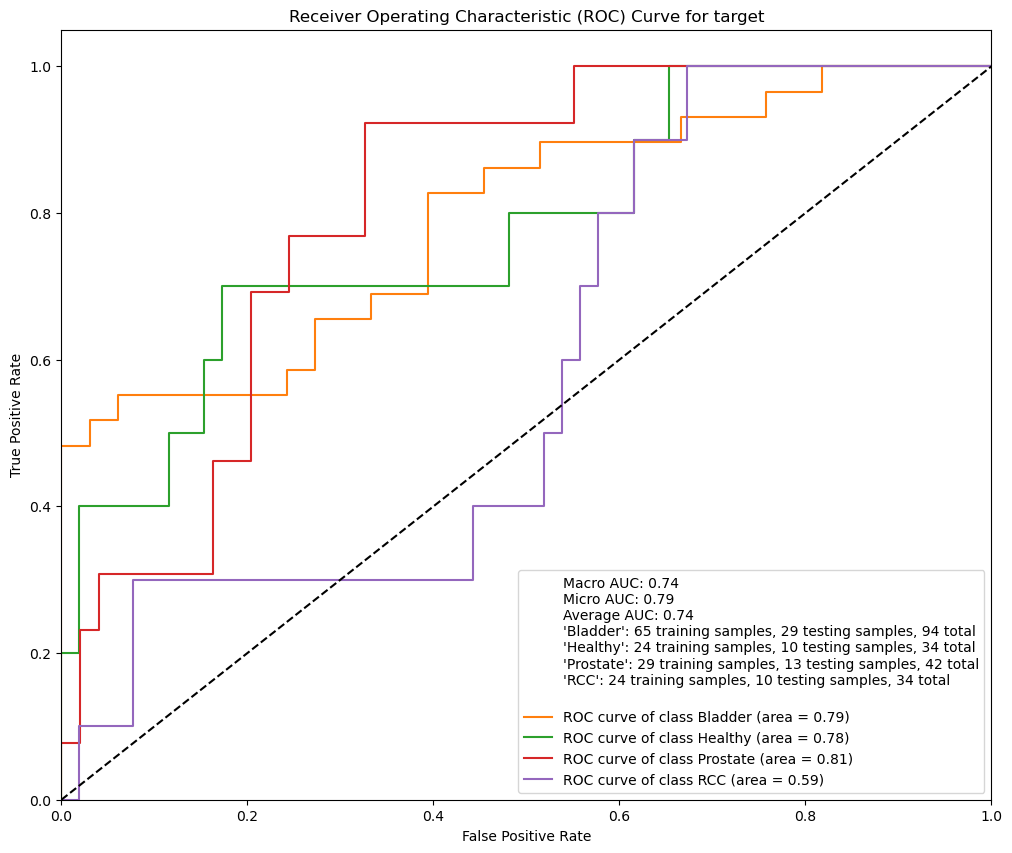

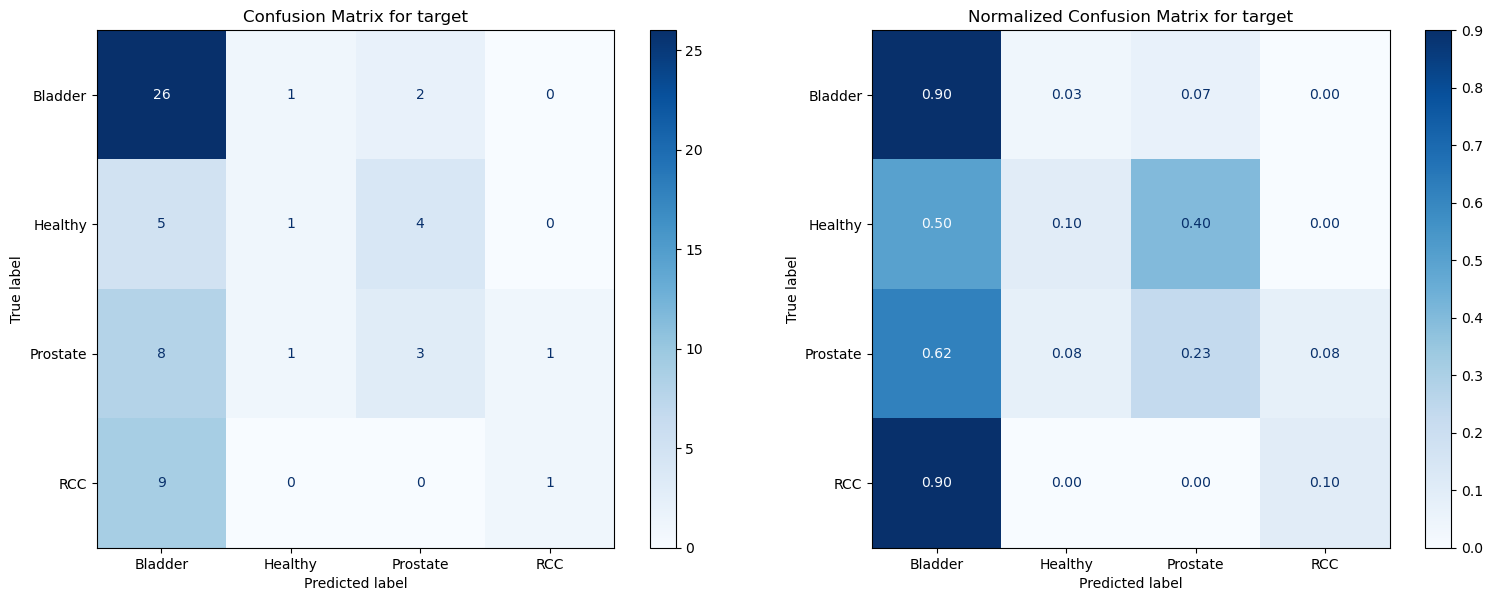

Best hyperparameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 5000}


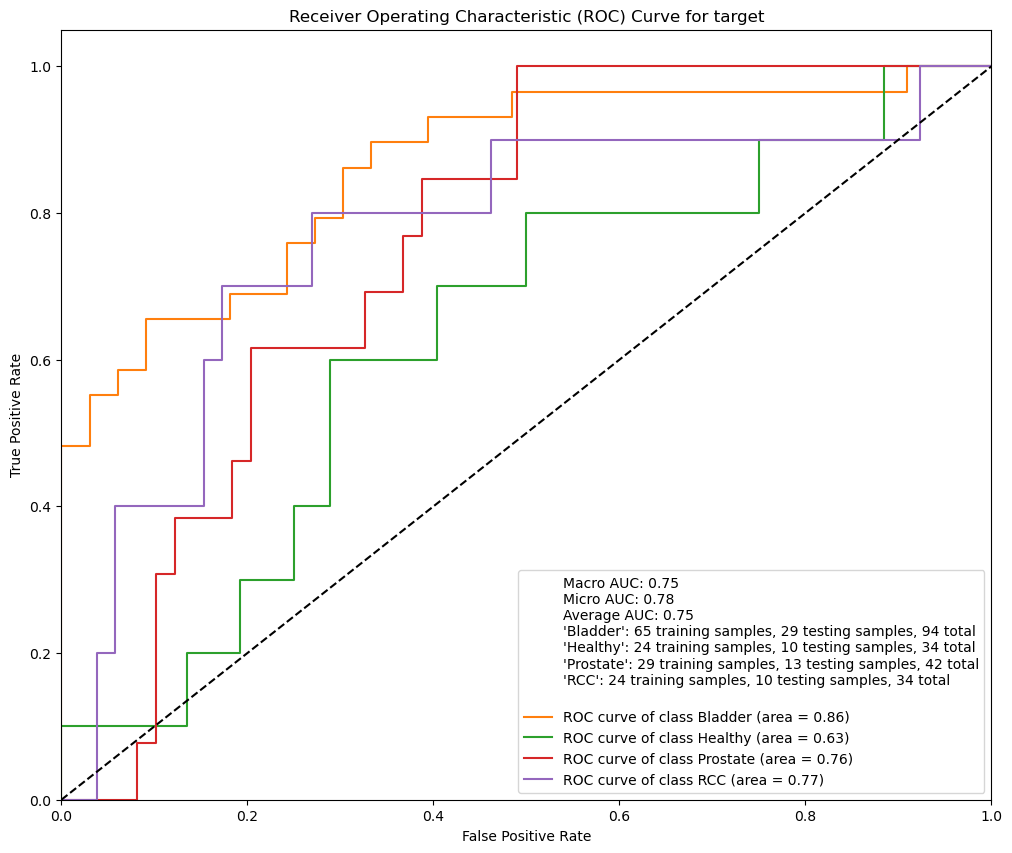

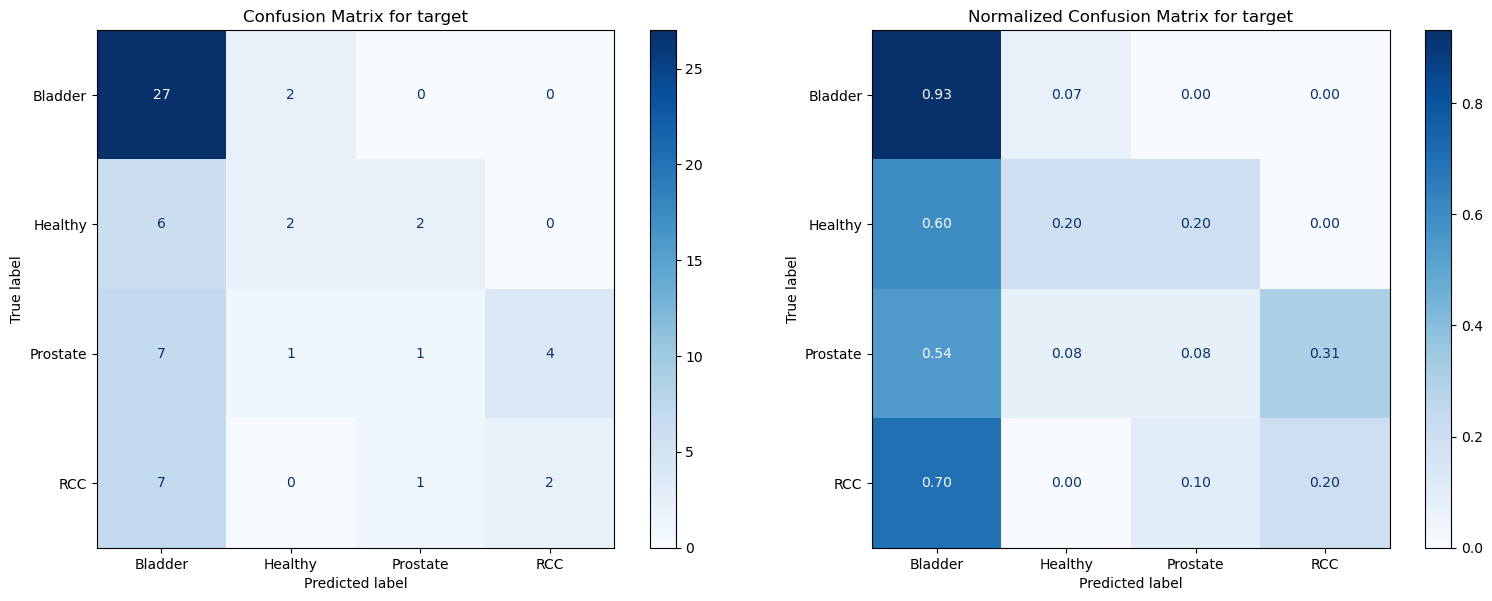

Best hyperparameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 5000}


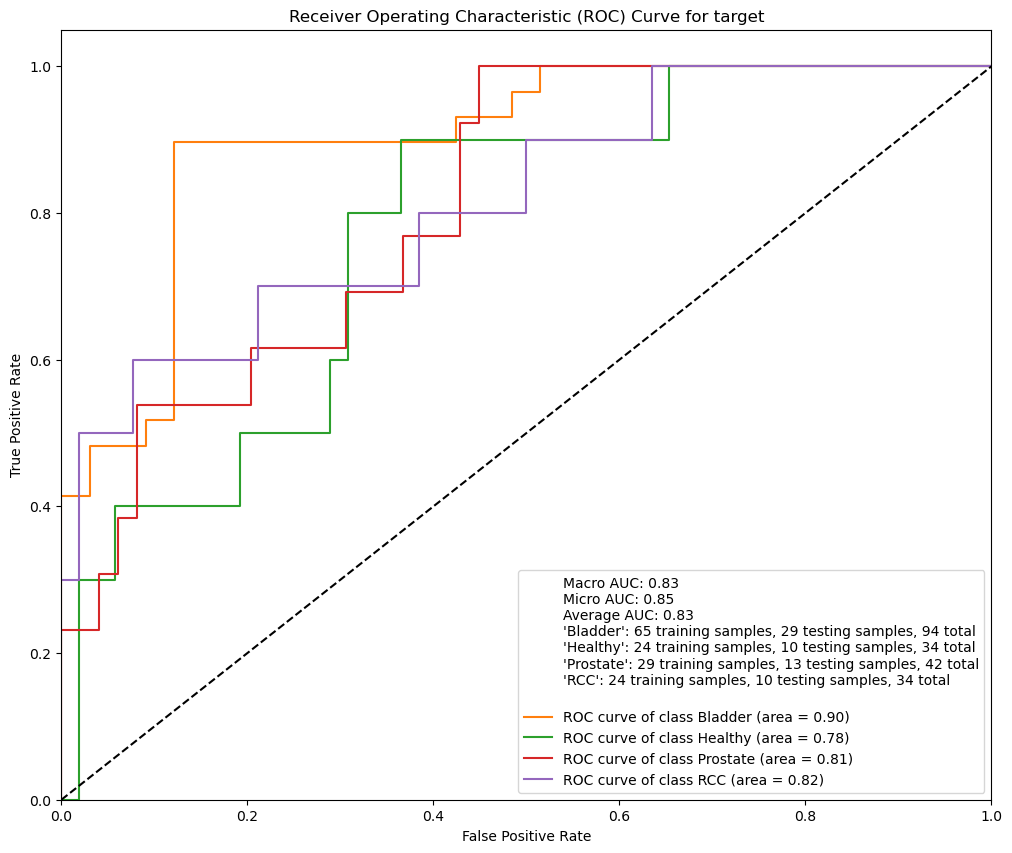

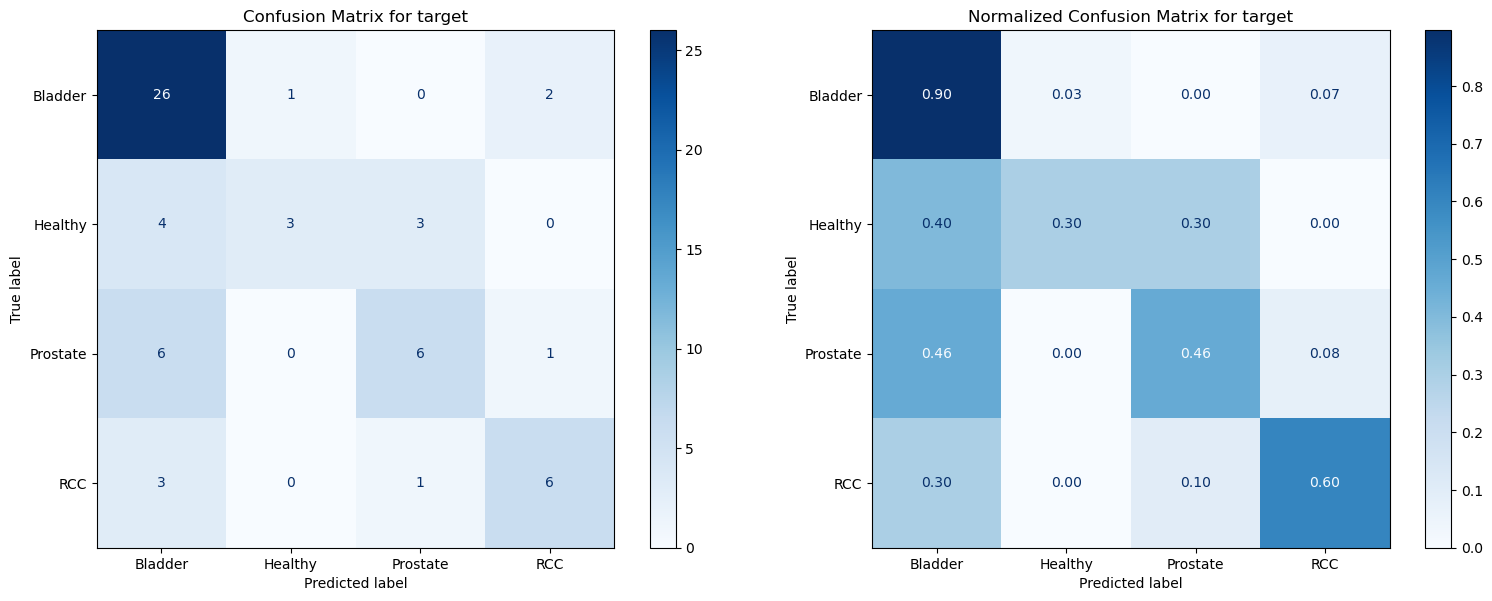

In [26]:
# # Train the models on their respective feature subsets using your train_model( function
from sklearn.ensemble import RandomForestClassifier
model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')



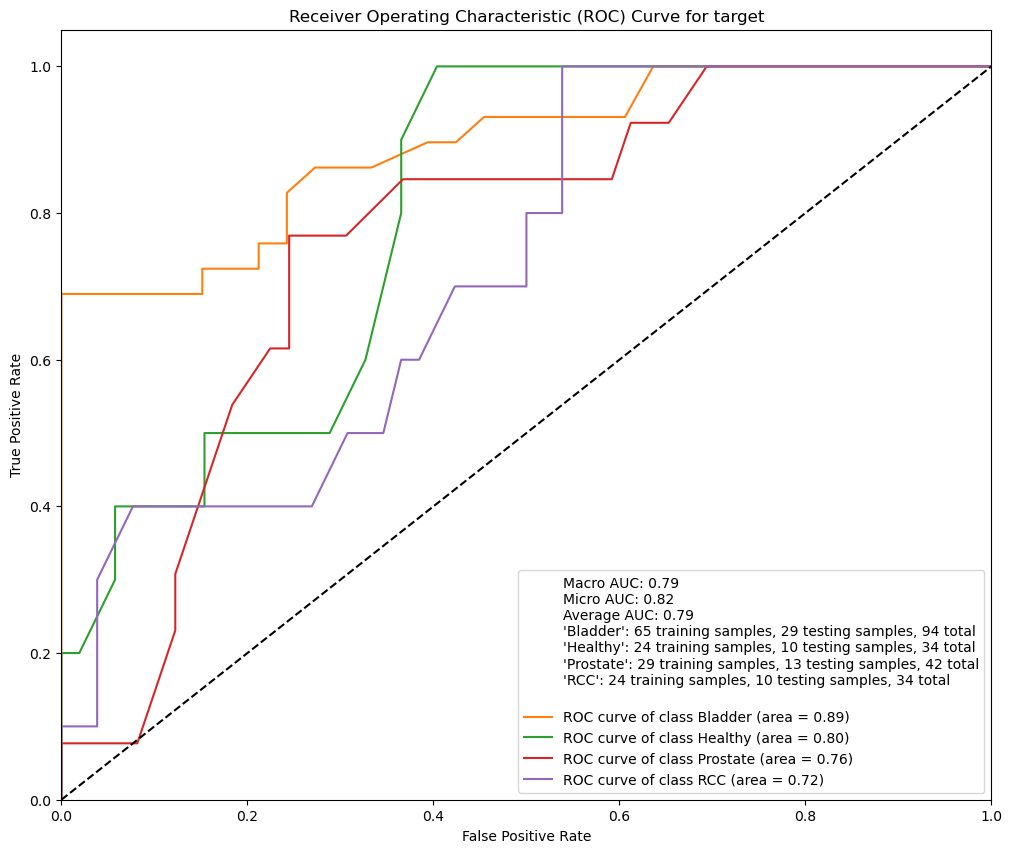

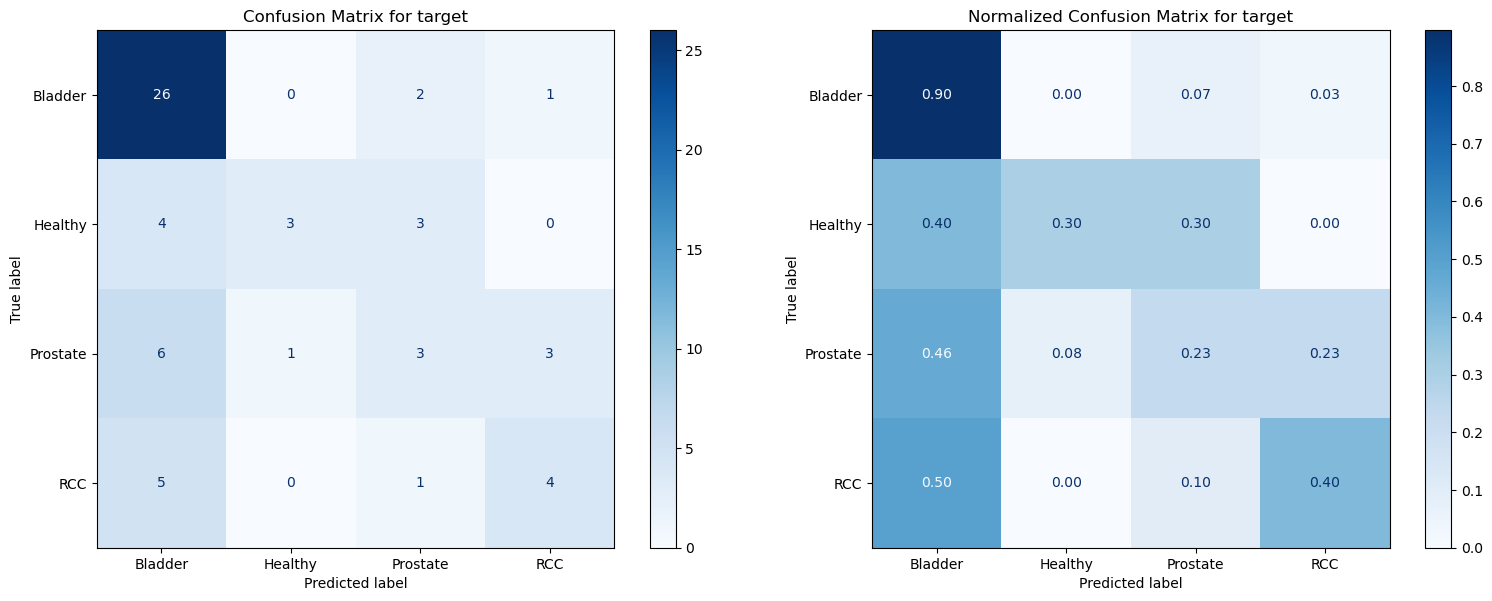

RandomForestClassifier(class_weight='balanced', random_state=0)

In [27]:
models.train_model(train_df, test_df)

Best hyperparameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


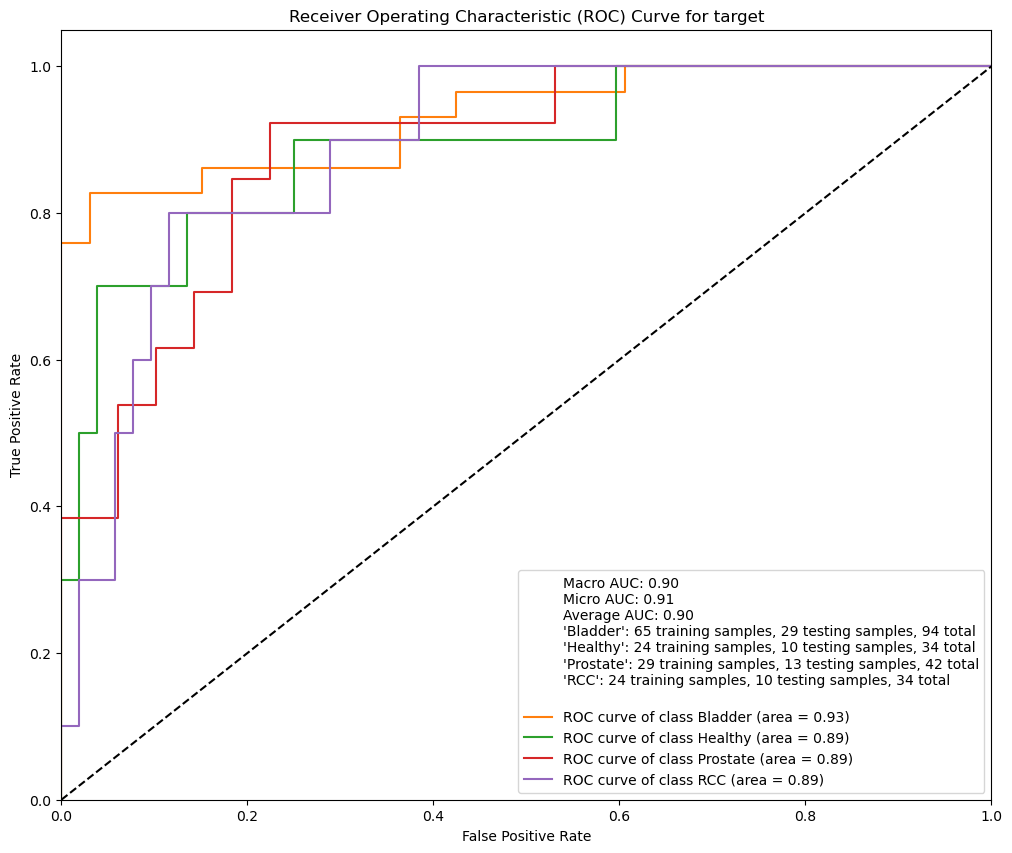

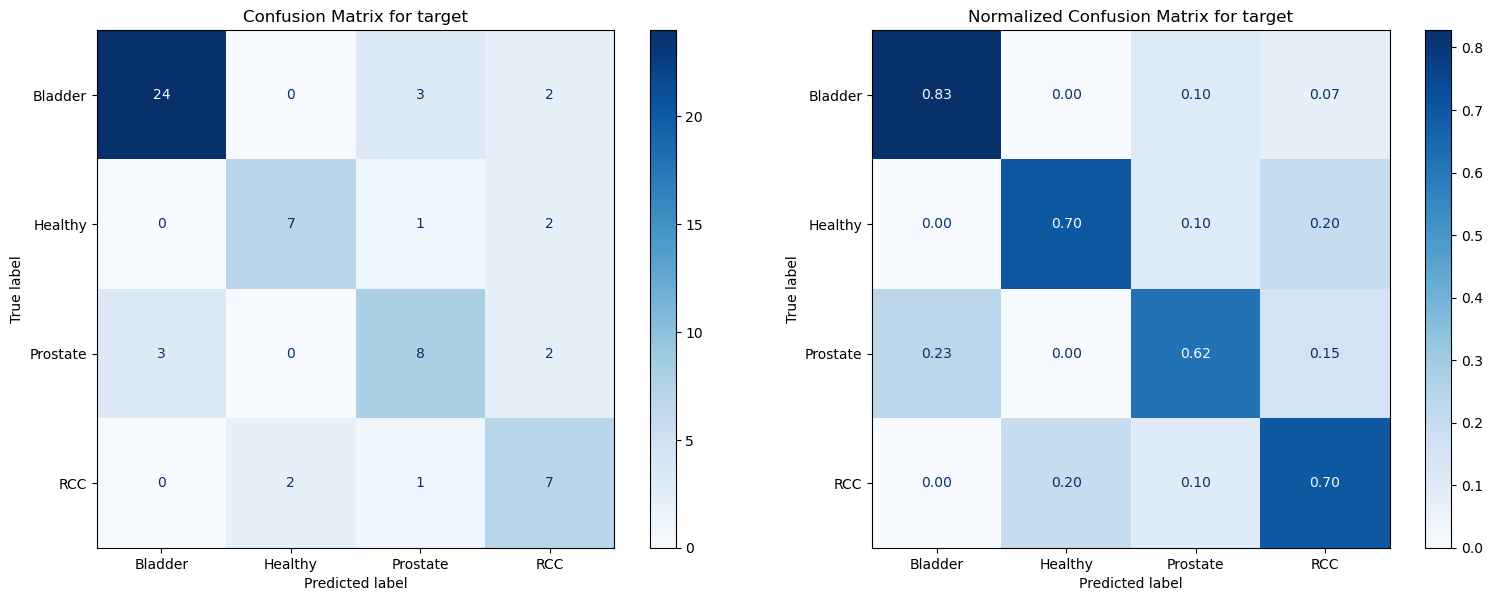

In [28]:
param_grid_log_reg = [
    {
        'penalty': ['l2'],         
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs'],       
        'max_iter': [200, 500, 1000]
    },
    {
        'penalty': ['l1', 'l2'],   
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],   
        'max_iter': [200, 500, 1000]
    },
    {
        'penalty': ['elasticnet'],  # Only include 'elasticnet' here
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],         
        'max_iter': [200, 500, 1000],
        'l1_ratio': [0.5]           # Only used with 'elasticnet'
    }
]





#log_reg_model = LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced')




# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_df, 
        test_df, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
)



Best hyperparameters found: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


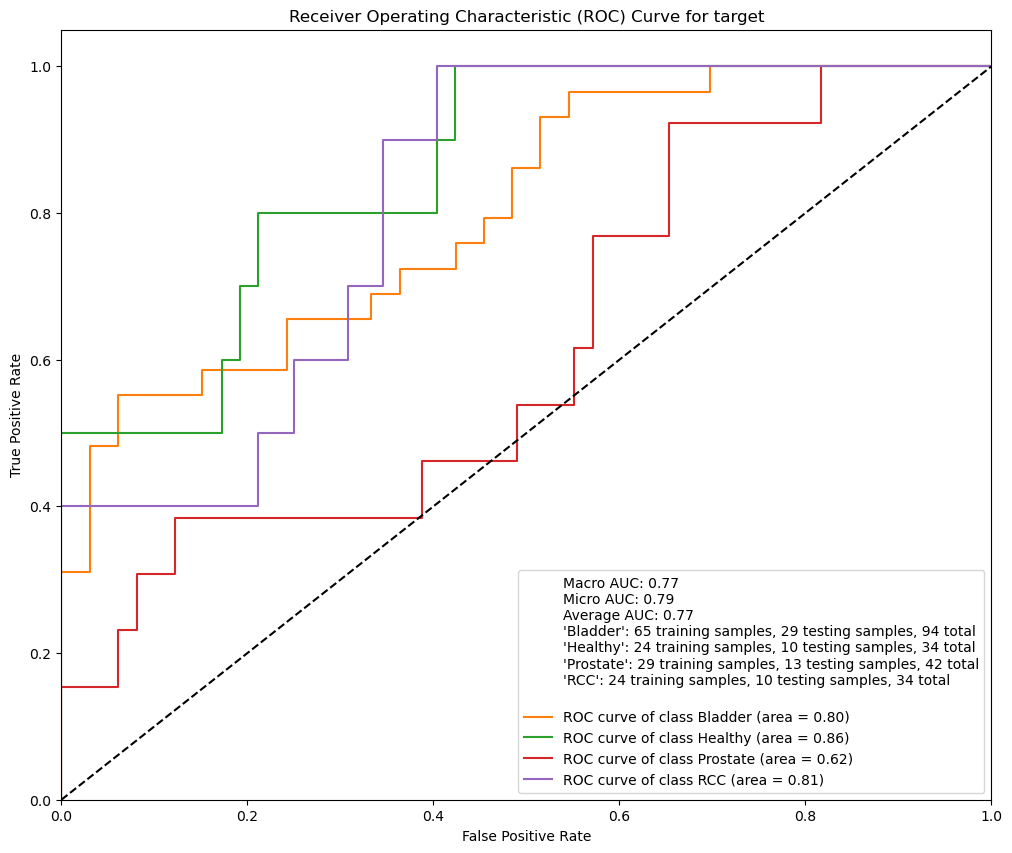

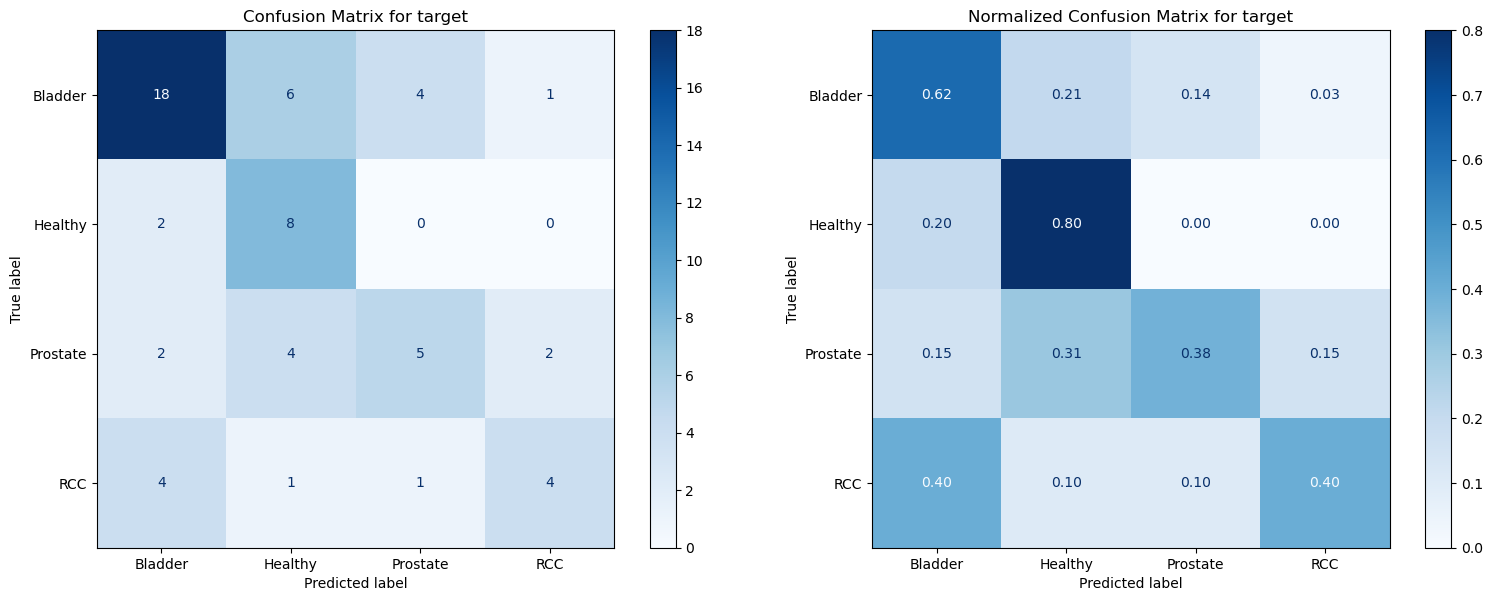

LogisticRegression(C=0.1, class_weight='balanced', max_iter=200, random_state=0)

In [29]:





models.train_model(CNA_train_df, CNA_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='balanced_accuracy',
            search_method='grid')
    



Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


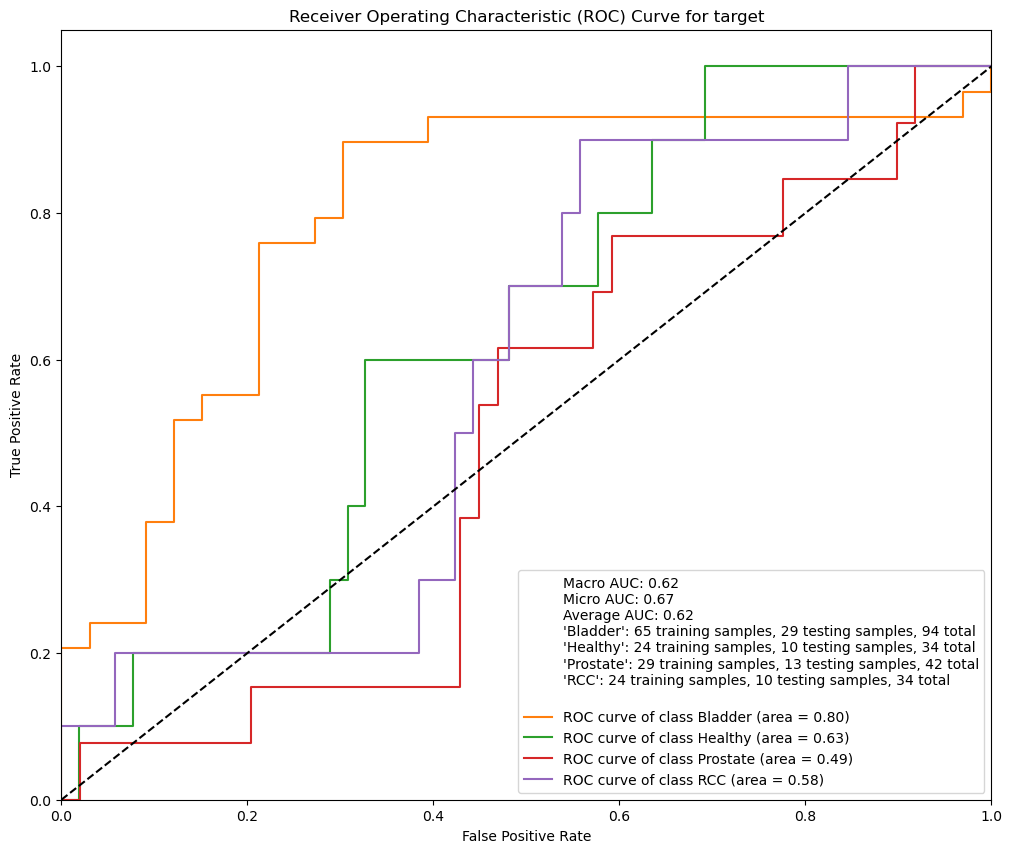

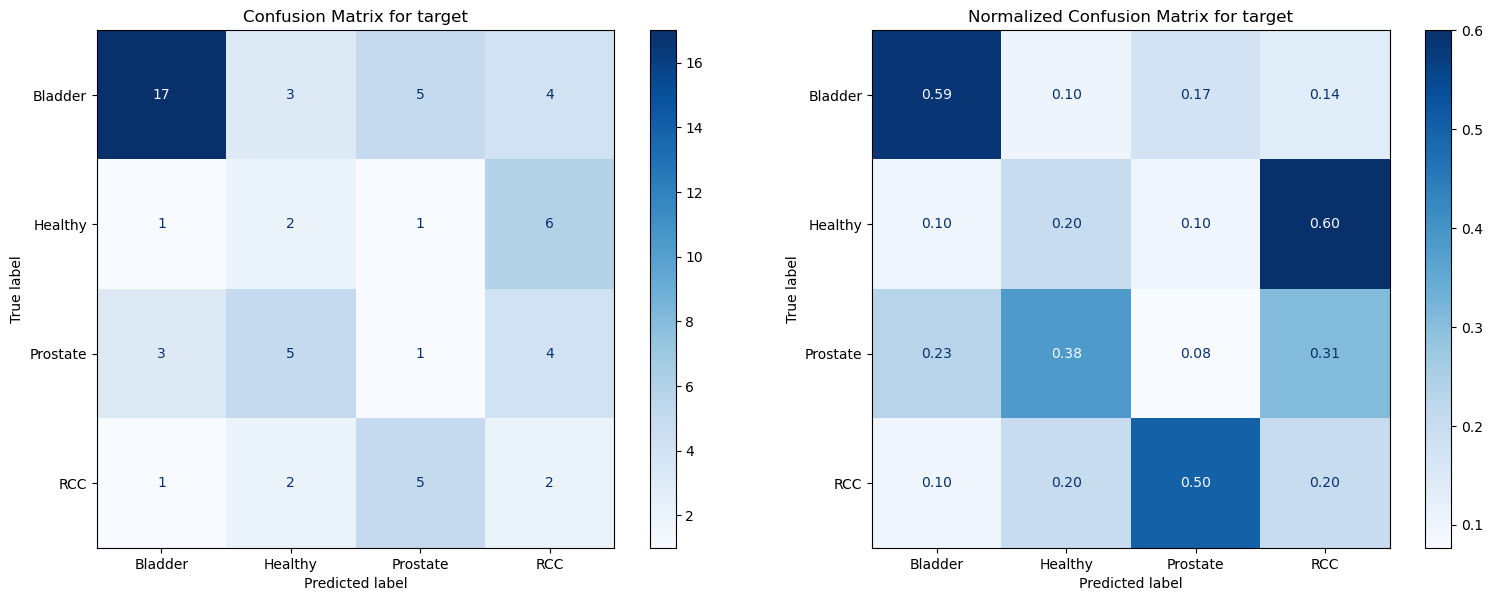

LogisticRegression(C=10, class_weight='balanced', max_iter=200, penalty='l1',
                   random_state=0, solver='liblinear')

In [30]:


models.train_model(Ratio_train_df, Ratio_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='balanced_accuracy',
            search_method='grid')

Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


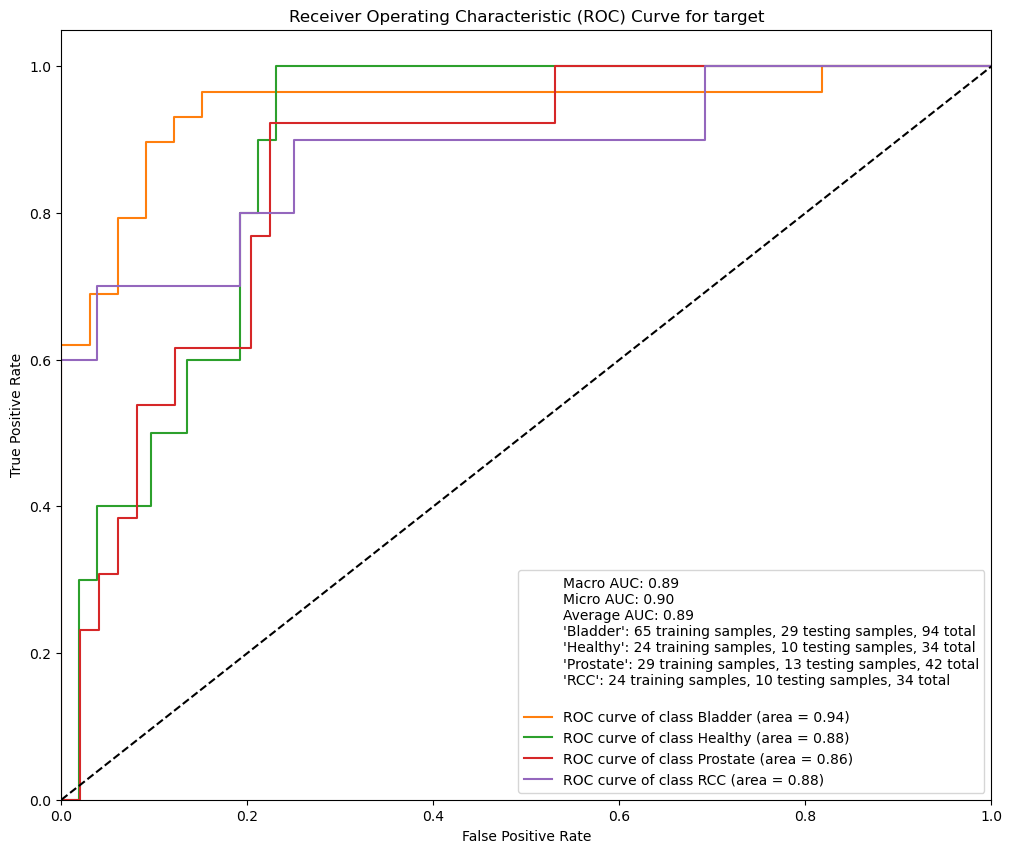

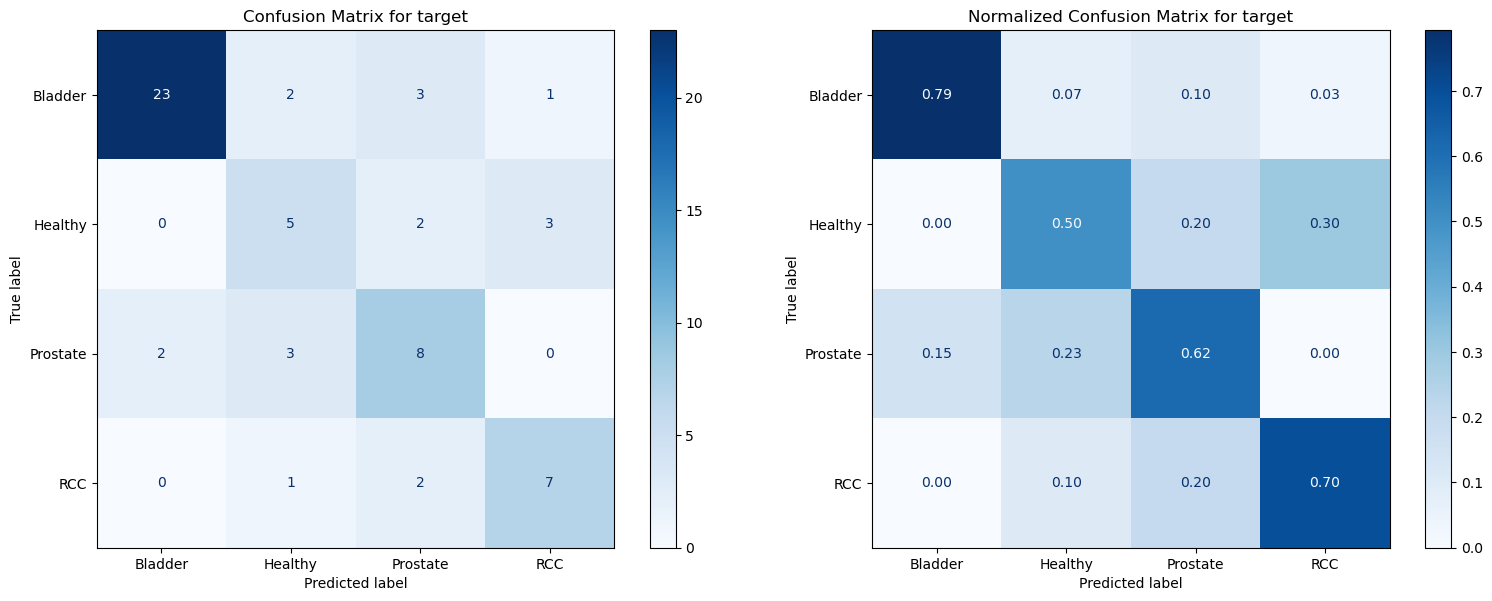

LogisticRegression(C=10, class_weight='balanced', max_iter=200, random_state=0,
                   solver='liblinear')

In [31]:
models.train_model(EndMotif_train_df, EndMotif_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='roc_auc_macro',
            search_method='grid')

Best hyperparameters found: {'C': 100, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}


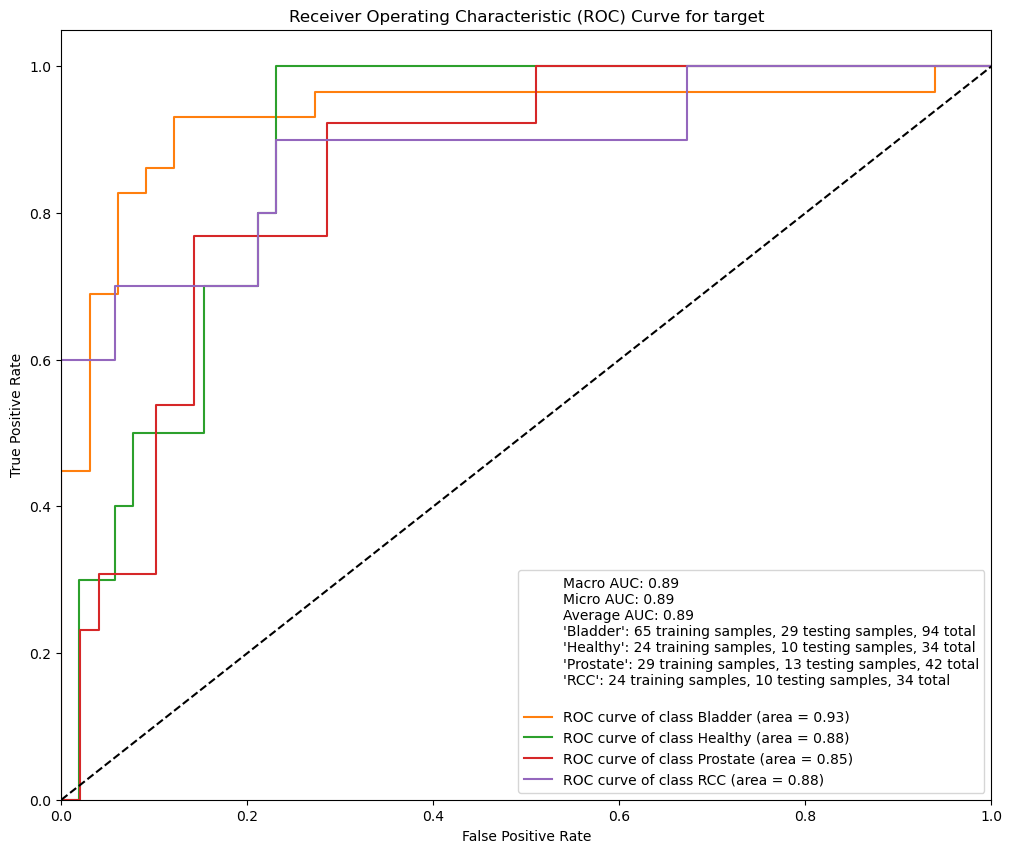

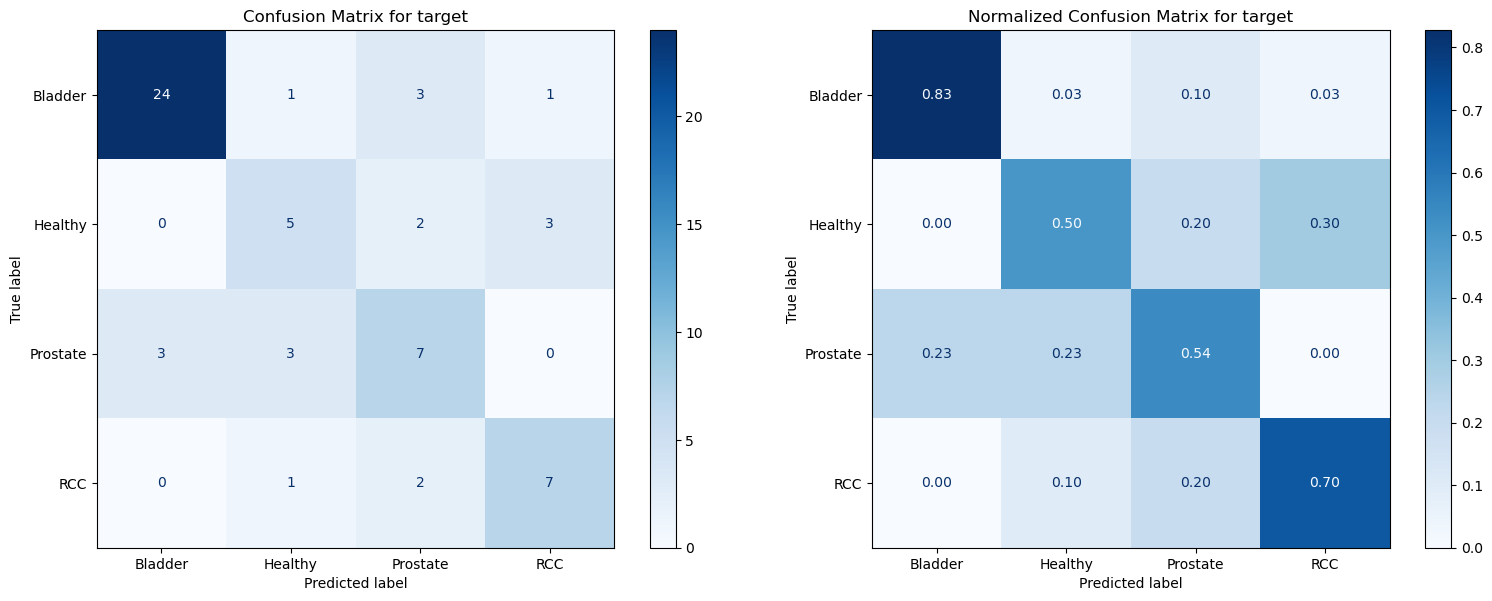

LogisticRegression(C=100, class_weight='balanced', max_iter=200, random_state=0,
                   solver='liblinear')

In [32]:

models.train_model(EndMotif_train_df, EndMotif_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
            scoring='balanced_accuracy',
            search_method='grid')

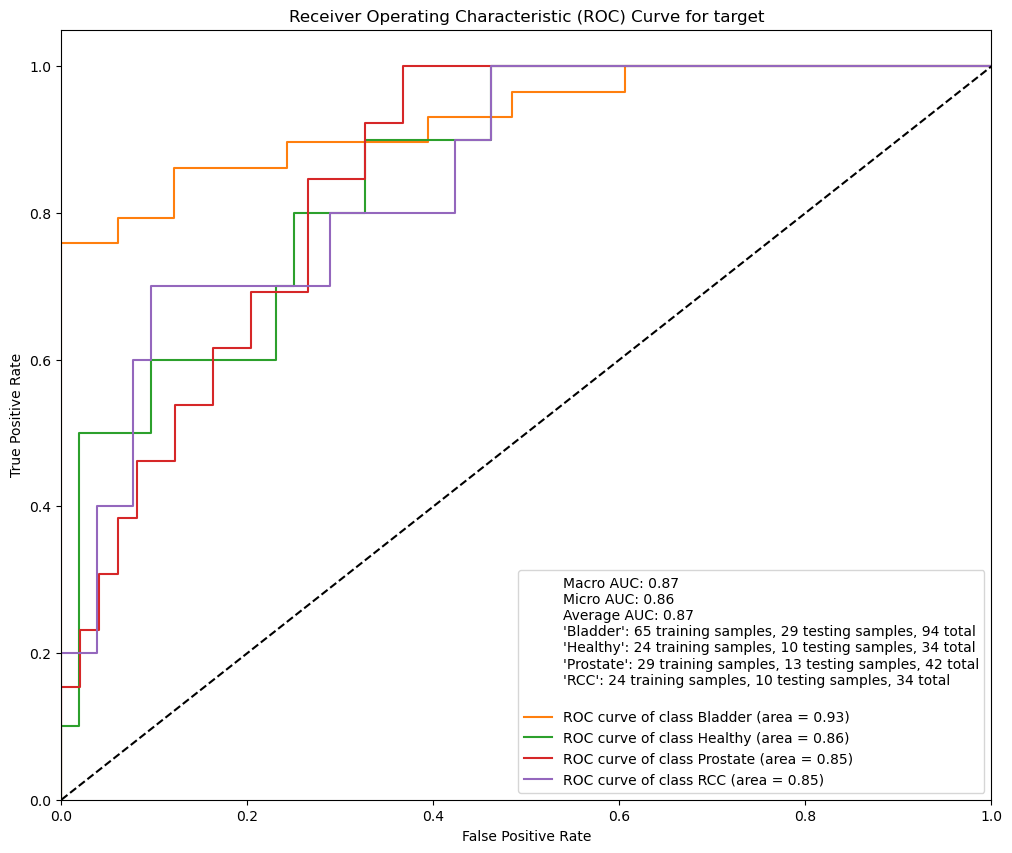

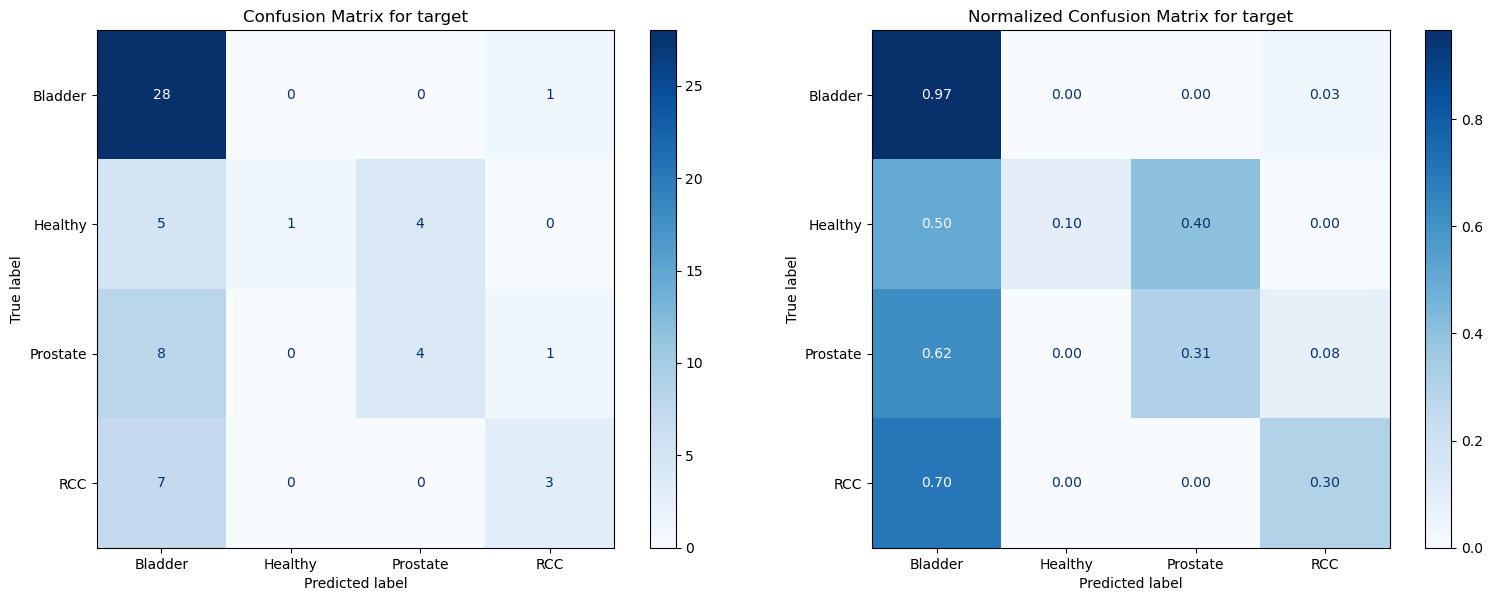

In [33]:
base_models = [model_CNA, model_Ratio, model_EndMotif]
train_dfs = [CNA_train_df, Ratio_train_df, EndMotif_train_df]
test_dfs = [CNA_test_df, Ratio_test_df, EndMotif_test_df]

meta_classifier = models.train_meta_classifier(base_models, train_dfs, test_dfs)

In [34]:
# from xgboost import XGBClassifier
# # Define your meta-classifier as XGBoost
# meta_classifier = XGBClassifier(random_state=0, n_estimators=100, learning_rate=0.1)

# Assuming base_models, train_dfs, and test_dfs are already defined
meta_classifier, y_meta_test_pred_decoded, y_meta_test = models.train_xgboost_meta_classifier(base_models, train_dfs, test_dfs)

# Output the true labels and the predicted labels
print("True labels:\n", y_meta_test.value_counts())
print("Predicted labels:\n", pd.Series(y_meta_test_pred_decoded).value_counts())

True labels:
 target
Bladder     29
Prostate    13
Healthy     10
RCC         10
Name: count, dtype: int64
Predicted labels:
 RCC        37
Bladder    19
Healthy     6
Name: count, dtype: int64


In [35]:
# model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')



EndMotif_feature_importance = preprocessing.extract_feature_importances(model_EndMotif, EndMotif_train_df)

CNA_feature_importance = preprocessing.extract_feature_importances(model_CNA, CNA_train_df)

Ratio_feature_importance = preprocessing.extract_feature_importances(model_Ratio, Ratio_train_df)


In [36]:

print(EndMotif_feature_importance)

print(CNA_feature_importance)

print(Ratio_feature_importance)

           Feature  Importance
99   EndMotif_CGAT    0.011399
60   EndMotif_ATTA    0.010843
96   EndMotif_CGAA    0.010594
44   EndMotif_AGTA    0.009694
164  EndMotif_GGCA    0.008945
..             ...         ...
176  EndMotif_GTAA    0.001727
234  EndMotif_TGGG    0.001699
151  EndMotif_GCCT    0.001608
226  EndMotif_TGAG    0.001448
238  EndMotif_TGTG    0.001373

[256 rows x 2 columns]
                                  Feature  Importance
141    CNA_chr2-CNA_67000001-CNA_68000000    0.009260
119   CNA_chr18-CNA_48000001-CNA_49000000    0.008047
167     CNA_chr20-CNA_7000001-CNA_8000000    0.007661
177   CNA_chr20-CNA_54000001-CNA_55000000    0.007511
37    CNA_chr10-CNA_65000001-CNA_66000000    0.007348
..                                    ...         ...
296    CNA_chr8-CNA_52000001-CNA_53000000    0.001027
307  CNA_chr8-CNA_106000001-CNA_107000000    0.000979
44    CNA_chr11-CNA_69000001-CNA_70000000    0.000964
59    CNA_chr12-CNA_65000001-CNA_66000000    0.000836
109     CN

In [37]:
feature_importances_dict = {
    'EndMotif': EndMotif_feature_importance,
    'CNA': CNA_feature_importance,
    'Ratio': Ratio_feature_importance
}

train_subset, test_subset = preprocessing.subset_top_k_features(train_df, test_df, k=300, feature_importances_dict=feature_importances_dict, target_name='target')

display(train_subset.head())
display(test_subset.head())

,Ratio_chr21-Ratio_15000000-Ratio_20000000,EndMotif_TCTA,CNA_chr12-CNA_91000001-CNA_92000000,CNA_chr3-CNA_167000001-CNA_168000000,EndMotif_AGTG,EndMotif_GCTT,CNA_chr4-CNA_154000001-CNA_155000000,EndMotif_TAAC,Ratio_chr12-Ratio_75000000-Ratio_80000000,CNA_chr8-CNA_13000001-CNA_14000000,...,CNA_chr13-CNA_42000001-CNA_43000000,CNA_chr3-CNA_156000001-CNA_157000000,CNA_chr3-CNA_161000001-CNA_162000000,Ratio_chr9-Ratio_15000000-Ratio_20000000,EndMotif_CGCC,Ratio_chr18-Ratio_65000000-Ratio_70000000,EndMotif_CTAG,Ratio_chr16-Ratio_85000000-Ratio_90000000,Ratio_chr16-Ratio_75000000-Ratio_80000000,target
PB-239_UC1,-0.247720,-0.281755,2.043323,-0.823649,0.015710,-0.042323,-0.128157,-0.166909,-0.153155,-0.140755,...,-0.482524,-0.639225,-0.881109,-0.092344,0.745756,-0.461578,-0.799919,0.232781,-0.023772,Prostate
PB-313_UC1,0.184887,-0.224609,0.080888,0.905468,0.213132,-1.419404,-0.128156,0.133952,0.166007,-0.140754,...,-0.482525,-0.639225,0.233750,0.085513,1.730436,0.232966,-0.696345,-0.160741,-0.110094,Prostate
RCC013_UC2,0.115254,0.642099,-0.937849,-0.823649,0.051748,-0.107894,-0.128153,-0.049572,0.062687,-0.140750,...,-0.482524,-0.639225,-0.881108,0.078942,-0.340314,0.118541,-0.130608,-0.092717,0.010635,RCC
PB-276_UC1,0.143956,-0.631365,0.522664,-0.317887,0.253065,0.570452,-0.128161,-0.525657,0.111327,-0.140752,...,0.848167,-0.426832,0.225992,0.083126,-0.577299,0.149924,0.095567,-0.116354,-0.151371,Prostate
WBC1206_UC1,0.155753,0.494025,-0.571945,3.002494,-1.345714,-0.249295,-0.128169,-0.139046,0.103442,-0.140751,...,0.520956,3.490900,3.134244,0.040265,0.171743,0.120316,0.059819,-0.114184,0.010578,Bladder


,Ratio_chr21-Ratio_15000000-Ratio_20000000,EndMotif_TCTA,CNA_chr12-CNA_91000001-CNA_92000000,CNA_chr3-CNA_167000001-CNA_168000000,EndMotif_AGTG,EndMotif_GCTT,CNA_chr4-CNA_154000001-CNA_155000000,EndMotif_TAAC,Ratio_chr12-Ratio_75000000-Ratio_80000000,CNA_chr8-CNA_13000001-CNA_14000000,...,CNA_chr13-CNA_42000001-CNA_43000000,CNA_chr3-CNA_156000001-CNA_157000000,CNA_chr3-CNA_161000001-CNA_162000000,Ratio_chr9-Ratio_15000000-Ratio_20000000,EndMotif_CGCC,Ratio_chr18-Ratio_65000000-Ratio_70000000,EndMotif_CTAG,Ratio_chr16-Ratio_85000000-Ratio_90000000,Ratio_chr16-Ratio_75000000-Ratio_80000000,target
PB204_UC1,-0.054409,0.177600,-0.446086,-0.823649,0.575252,-0.686693,-0.128154,0.218135,-0.001204,-0.140756,...,-0.482525,-0.639224,0.036341,0.217133,-0.090430,-0.070008,-0.041396,-0.016046,0.122781,Prostate
WBC1308_UC1,0.129897,0.279021,-0.937849,-0.199083,0.220855,0.617535,-0.128167,-1.012180,0.099030,-0.140753,...,-0.482524,-0.639224,-0.037887,0.268949,-1.108081,0.112290,0.612293,-0.115613,-0.127267,Bladder
BC011_UC1,0.621172,0.415149,5.103920,1.342111,-0.335437,-0.284003,-0.128165,0.859570,0.298643,-0.140751,...,1.002451,2.030654,-0.025475,1.147594,1.696850,0.798331,-0.419094,-0.592061,-0.183422,Bladder
BC016_UC1,-0.281585,2.758423,0.663935,2.204257,-1.151739,-1.616976,-0.128155,1.701840,0.059804,-0.140753,...,1.610106,2.613517,2.422634,0.026199,0.808695,-0.000582,-0.564154,-0.051446,1.056849,Bladder
WBC1088_UC1,0.193754,1.244250,0.784492,0.630143,-0.473002,-0.601798,-0.128157,0.945015,0.128520,-0.140753,...,1.796740,0.875150,0.856701,0.198122,0.720744,0.179368,-0.761440,-0.156015,-0.104033,Bladder


Best hyperparameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


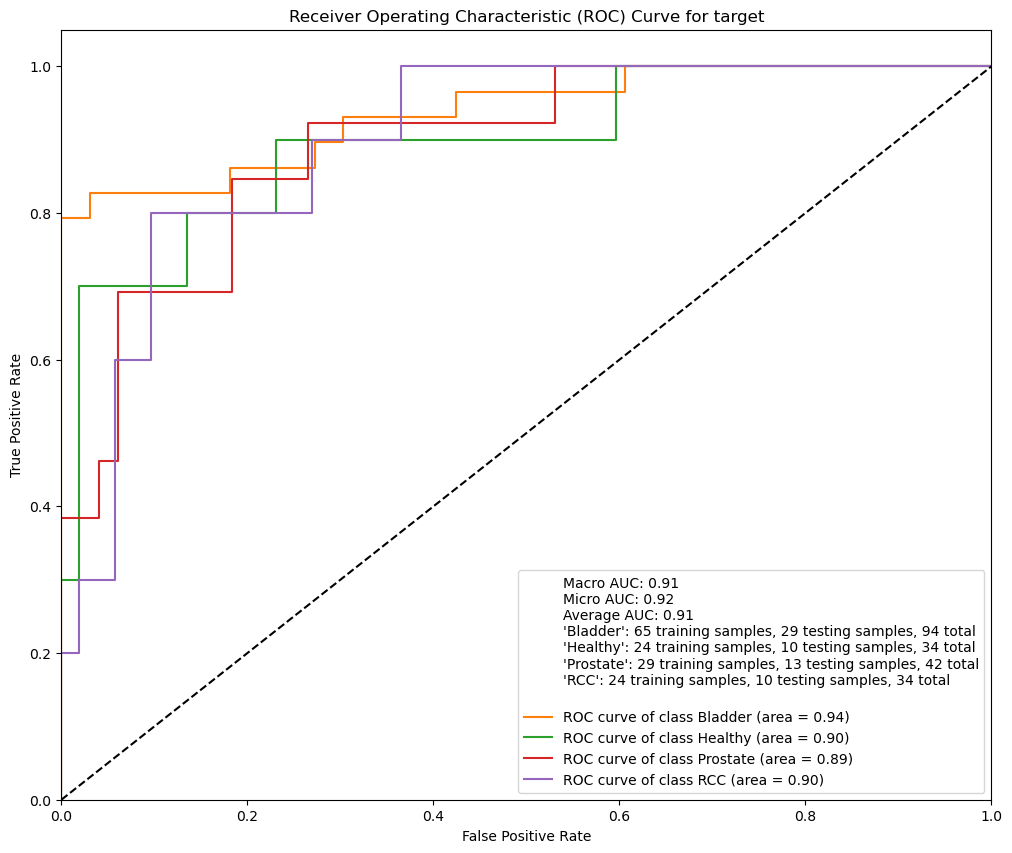

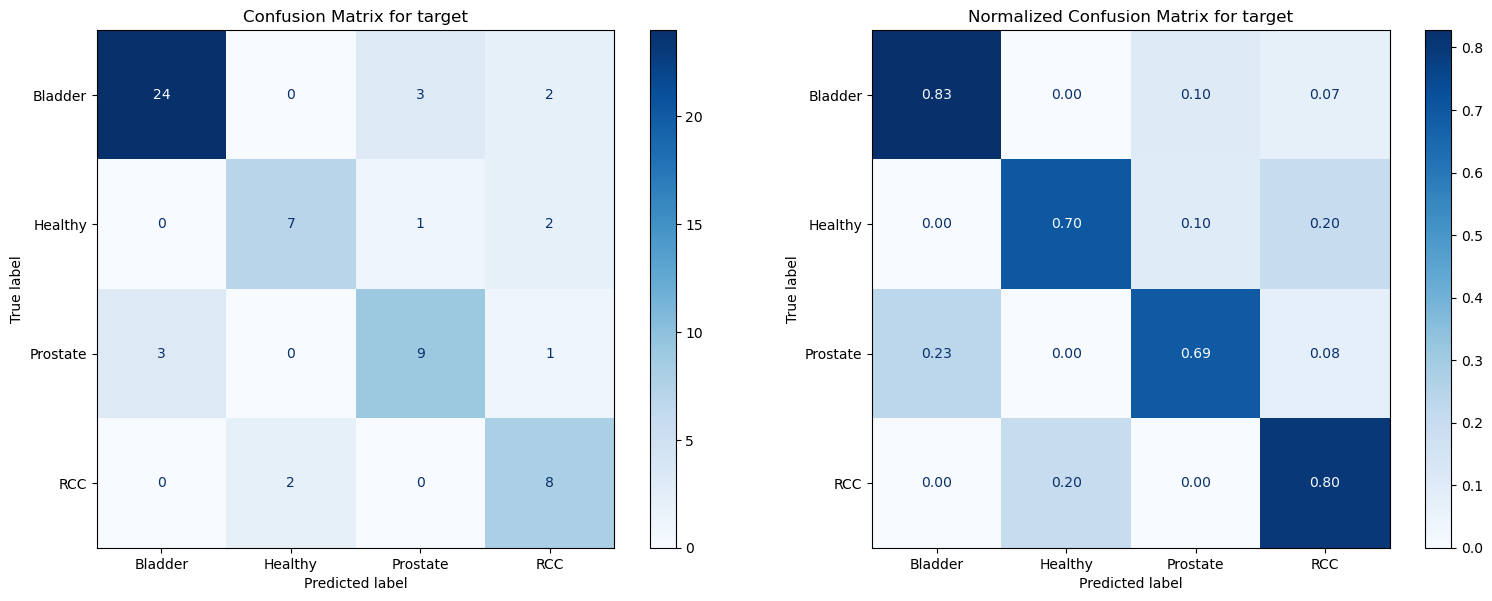

In [38]:

# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
)

Best hyperparameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


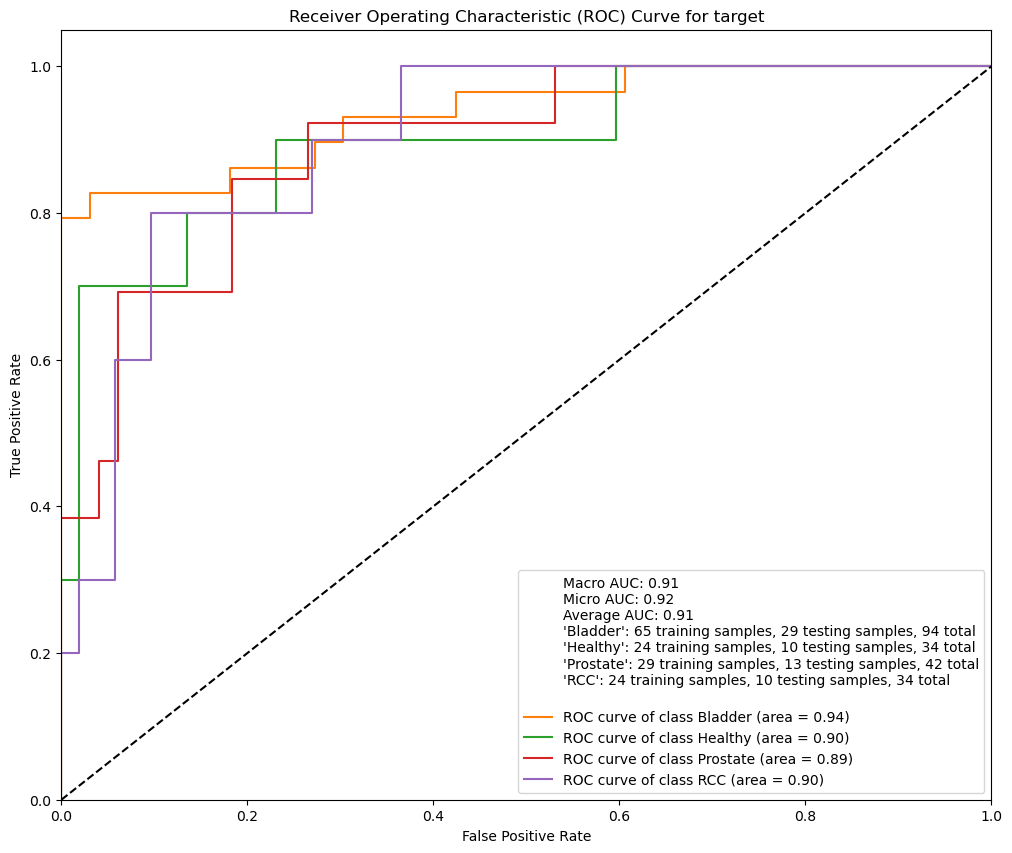

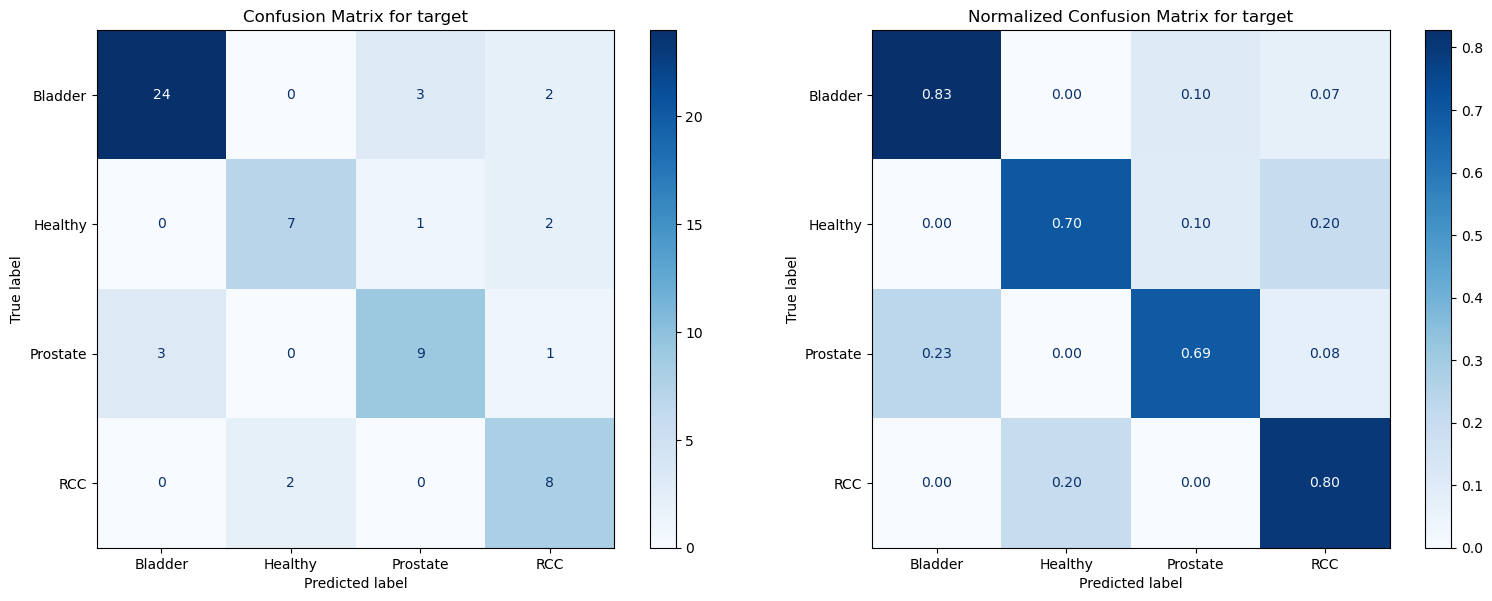

In [39]:
# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_macro',
        search_method='grid'
)

Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


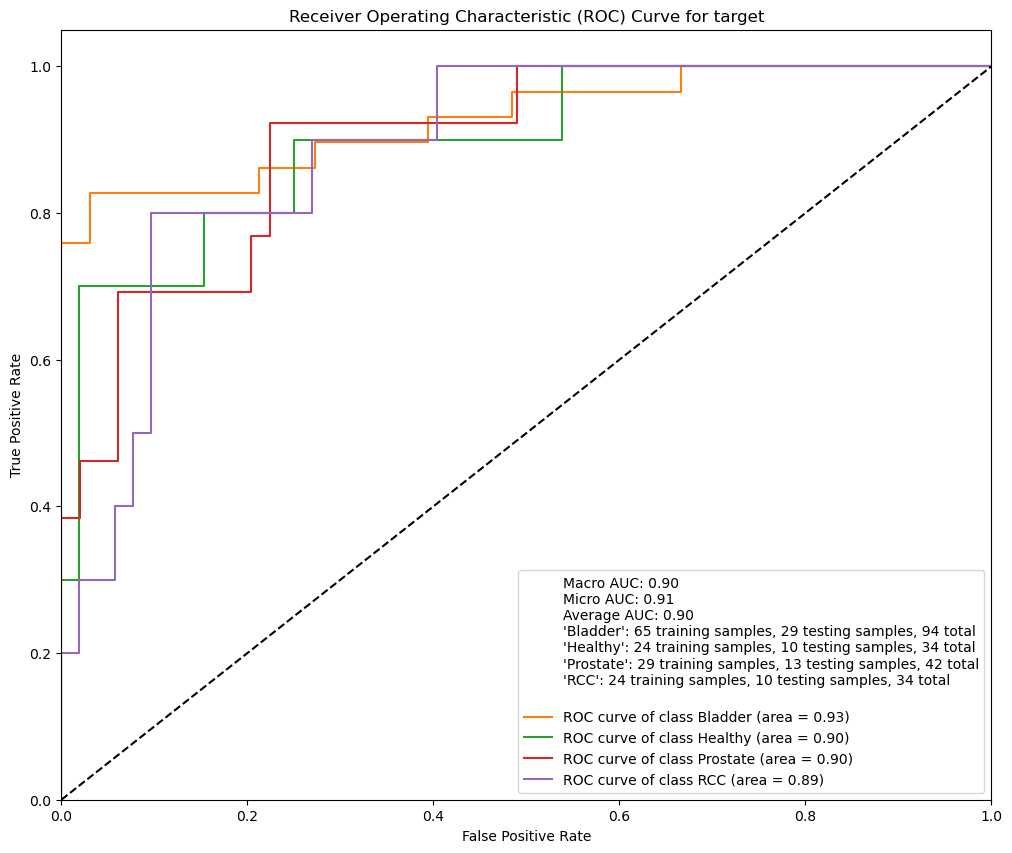

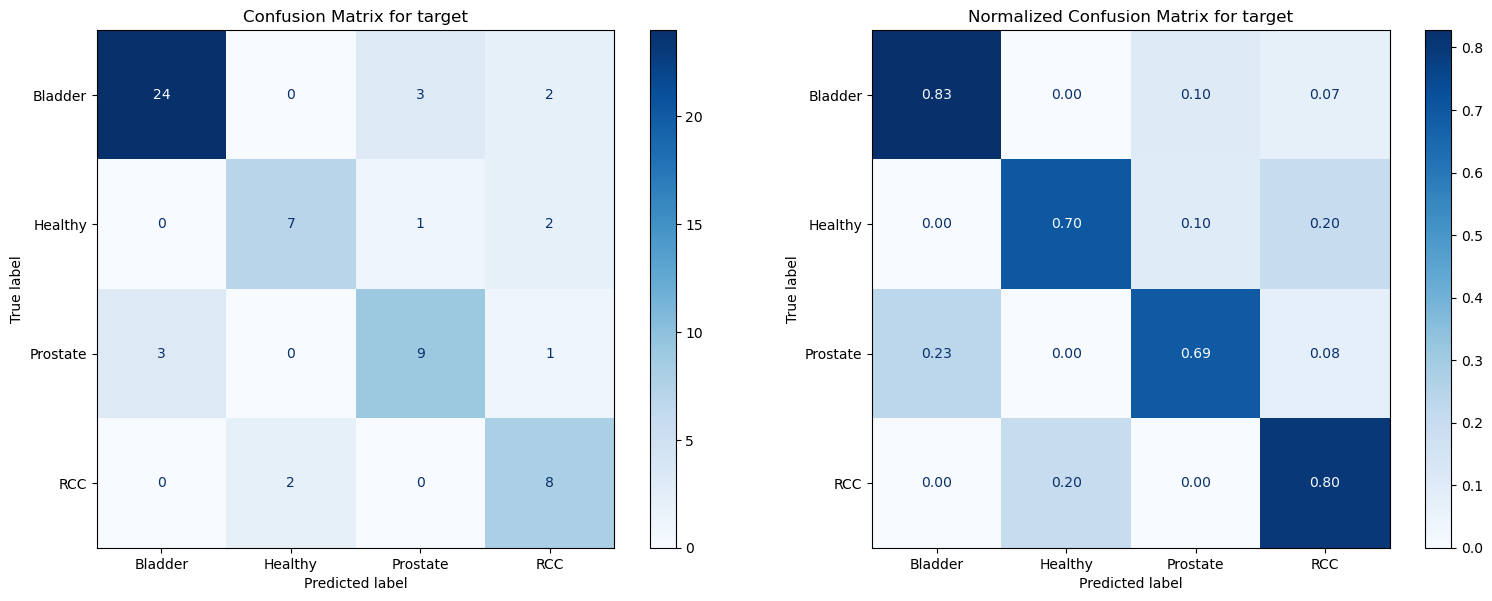

In [40]:


# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='balanced_accuracy',
        search_method='grid'
)

In [41]:
import sys
sys.exit()

SystemExit: 

# Biological Significance
## End motif

In [ ]:
EndMotif_feature_importance.head()

In [ ]:
EndMotif_feature_importance.tail()

In [ ]:
#train_df, test_df
train_df.head()

In [ ]:
import Biological_significace as Biosig
import os
import pandas as pd
from statsmodels.stats.multitest import multipletests

def save_plots_and_create_summary(df, feature_df, target_name='target', save_dir=None):
    """
    This function generates and saves box plots for each feature listed in the 'Feature' column of feature_df,
    saves the plots using the plot_feature_boxplot_with_anova function, and creates a summary DataFrame containing
    the F-statistic, p-value, and Benjamini-Hochberg (BH) corrected p-values for each feature.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features and target.
    feature_df (pd.DataFrame): A DataFrame with a column named 'Feature' listing the features to analyze.
    target_name (str): The name of the target column in df, default is 'target'.
    save_dir (str): The directory where the plots and summary will be saved. This is a required argument.
    
    Returns:
    pd.DataFrame: A DataFrame containing the F-statistic, p-value, and BH-corrected p-value for each feature.
    """
    if not save_dir:
        raise ValueError("The save_dir argument is required.")
    
    # Check if the directory already exists, if so, raise an error
    if os.path.exists(save_dir):
        raise FileExistsError(f"The directory '{save_dir}' already exists. Please choose a different directory or remove it.")
    
    # Create the save directory
    os.makedirs(save_dir)
    
    summary = []
    class_order= ['Bladder','Prostate','RCC','Healthy']
    
    for feature in feature_df['Feature']:
        # Define the save path for each plot
        save_path = os.path.join(save_dir, f"{feature}_boxplot.png")
        
        # Generate and save the plot, and get the F-statistic and p-value
        f_stat, p_value = Biosig.plot_feature_boxplot_with_kruskal(df, feature, target_name=target_name, save_path=save_path, class_order= class_order)
        
        # Append the results to the summary list
        summary.append({
            'Feature': feature,
            'F-statistic': f_stat,
            'p-value': p_value
        })
    
    # Create a summary DataFrame from the list
    summary_df = pd.DataFrame(summary)
    
    # Perform Benjamini-Hochberg correction
    _, bh_corrected_pvals, _, _ = multipletests(summary_df['p-value'], method='fdr_bh')
    
    # Add the BH-corrected p-values to the DataFrame
    summary_df['BH-corrected p-value'] = bh_corrected_pvals
    
    # Save the summary DataFrame as a CSV file in the save directory
    summary_csv_path = os.path.join(save_dir, 'summary.csv')
    summary_df.to_csv(summary_csv_path, index=False)
    
    # Return the summary DataFrame
    return summary_df


In [ ]:

Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AATA')
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AATA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AGTG',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_CGAA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_TCTA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_TGTG',class_order= ['Bladder','Prostate','RCC','Healthy'])

In [ ]:
EndMotif_Bio = save_plots_and_create_summary(train_df, EndMotif_feature_importance,  save_dir=Output_dir+'/EdMotif_traindf_KruskalWallis/')
display(EndMotif_Bio.head())